# Data Mining

## Problem Statement

### Context

The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


### Objective

The objective of the analysis is to cluster the states based on the given dataset "State_wise_Health_income.csv," considering both health and economic indicators. By grouping states with similar conditions, the goal is to provide the government with valuable insights for implementing targeted measures to improve the health and economic conditions of each group.


###  Data Description

1. States: Names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4. Per_capita_income: Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing Libraries

In [44]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [45]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [46]:
# loading the dataset
data = pd.read_csv('State wise Health income.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [47]:
data.shape

(296, 6)

* The dataset has --- rows and --- columns

### Displaying few rows of the dataset

In [48]:
data.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


### Creating a Copy of the Original Data

In [49]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [50]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         296 non-null    int64 
 1   States             296 non-null    object
 2   Health_indices1    296 non-null    int64 
 3   Health_indices2    296 non-null    int64 
 4   Per_capita_income  296 non-null    int64 
 5   GDP                296 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


- All the columns in the data are ----

### Checking the missing values

In [51]:
# checking for missing values
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indices1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

- There are no missing values in the data.

### Checking the unique values

In [52]:
# checking the number of unique values in each column
data.nunique()

Unnamed: 0           296
States               296
Health_indices1      277
Health_indices2      248
Per_capita_income    278
GDP                  285
dtype: int64

### Dropping variables

**We will drop the *"Unnamed: 0* as it do not add any value to the analysis.**

In [53]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Statistical summary of the dataset

In [54]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indices1,296.0,2629.195946,2041.890970,-10.0,640.0,2446.5,4102.75,10219.0
Health_indices2,296.0,693.594595,469.738035,0.0,173.5,810.5,1076.00,1508.0
Per_capita_income,296.0,2159.597973,1493.663013,500.0,746.0,1869.0,3138.75,7049.0
GDP,296.0,174717.050676,167439.128587,22.0,8679.5,135748.5,314751.25,728575.0


**Observations**



## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [55]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [56]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

#### `Health_indices1`

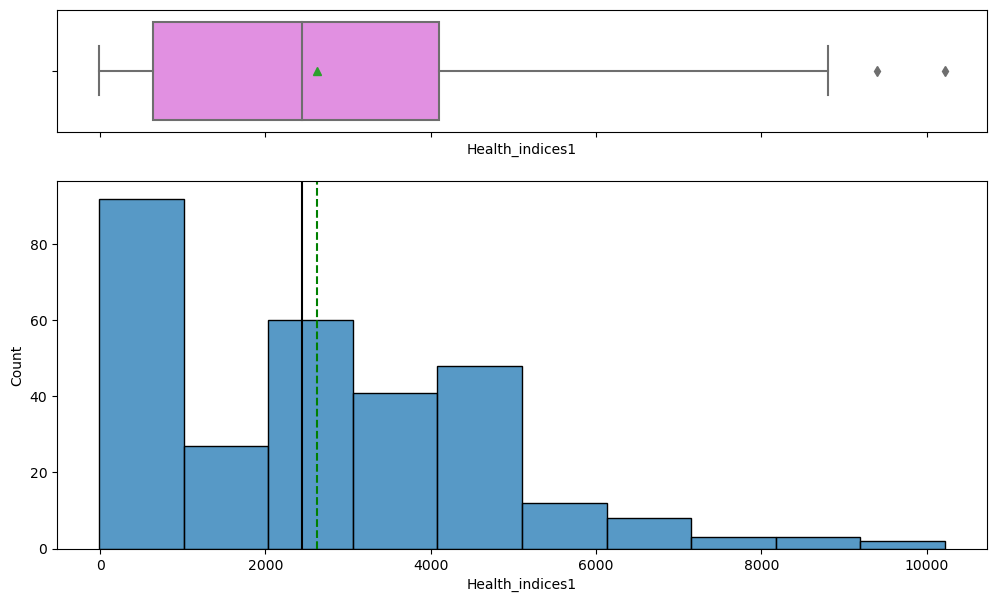

In [57]:
 histogram_boxplot(df, 'Health_indices1', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight') ## Complete the code to get the histogram and boxplot of Health_indices1 variable

**Observations**



#### `Health_indices2`

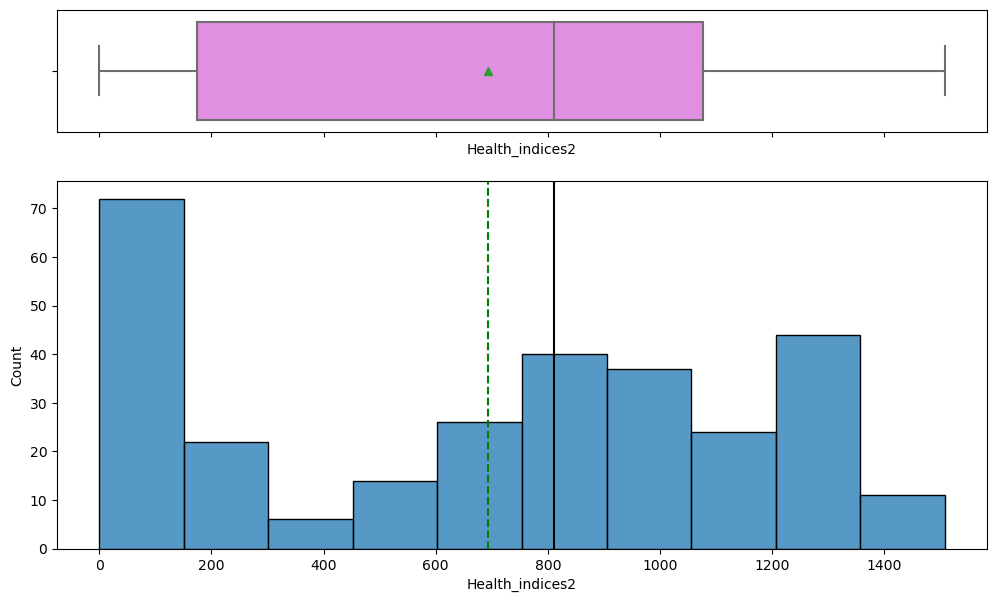

In [58]:
 histogram_boxplot(df, 'Health_indices2', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to get the histogram and boxplot of Health_indices2 variable

**Observations**



#### `Per Capita Income`

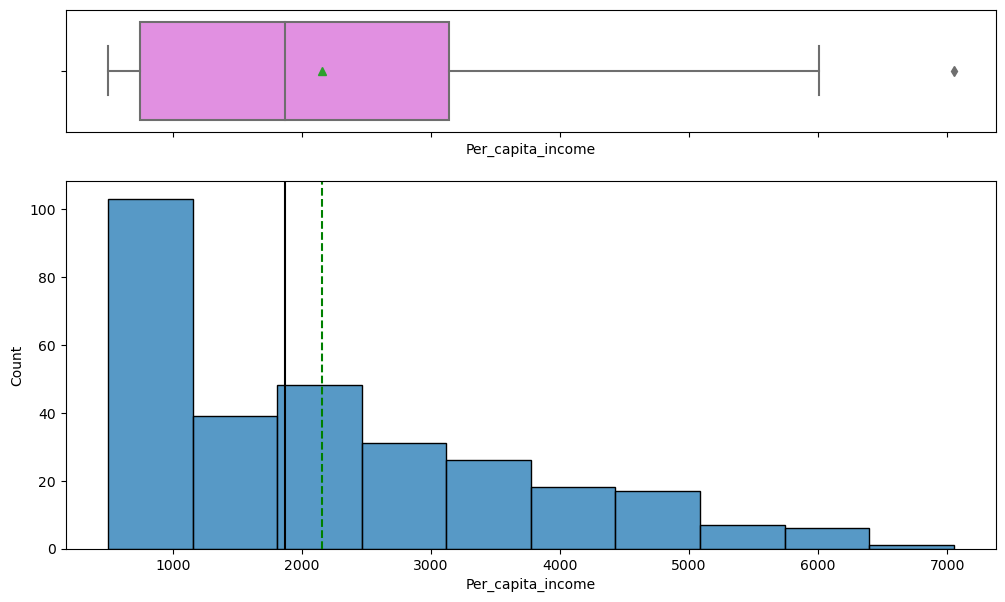

In [59]:
 histogram_boxplot(df, 'Per_capita_income', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight') ## Complete the code to get the histogram and boxplot of Per_capita_income variable

**Observations**



#### `GDP`

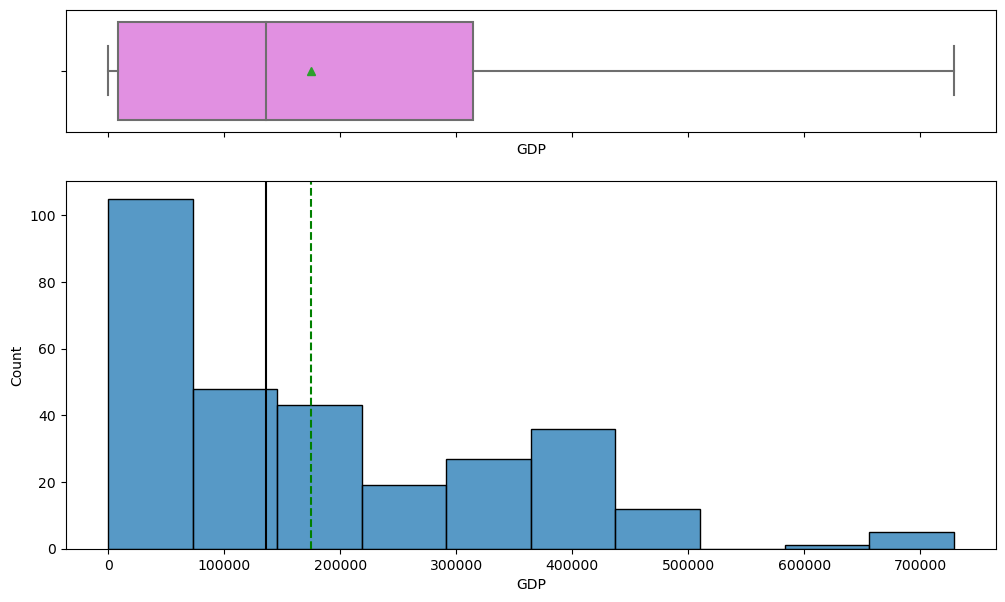

In [60]:
 histogram_boxplot(df, 'GDP', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight') ## Complete the code to get the histogram and boxplot of GDP variable

**Observations**



#### `States`

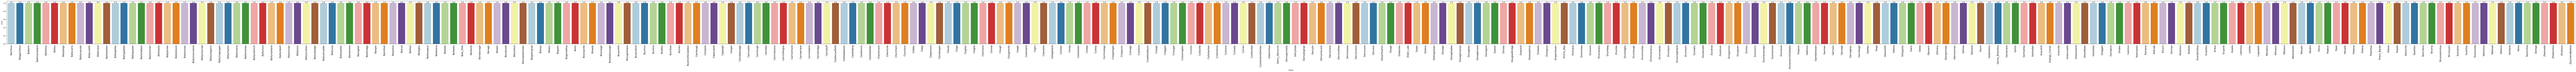

In [61]:
labeled_barplot(df, 'States', perc=False, n=None)
## Complete the code to get the labeled barplot of States variable

**Observations**



#### Drop the variable

In [62]:
df.drop(columns=["States"], inplace=True)                 ## Drop the States variable

### CDF plot

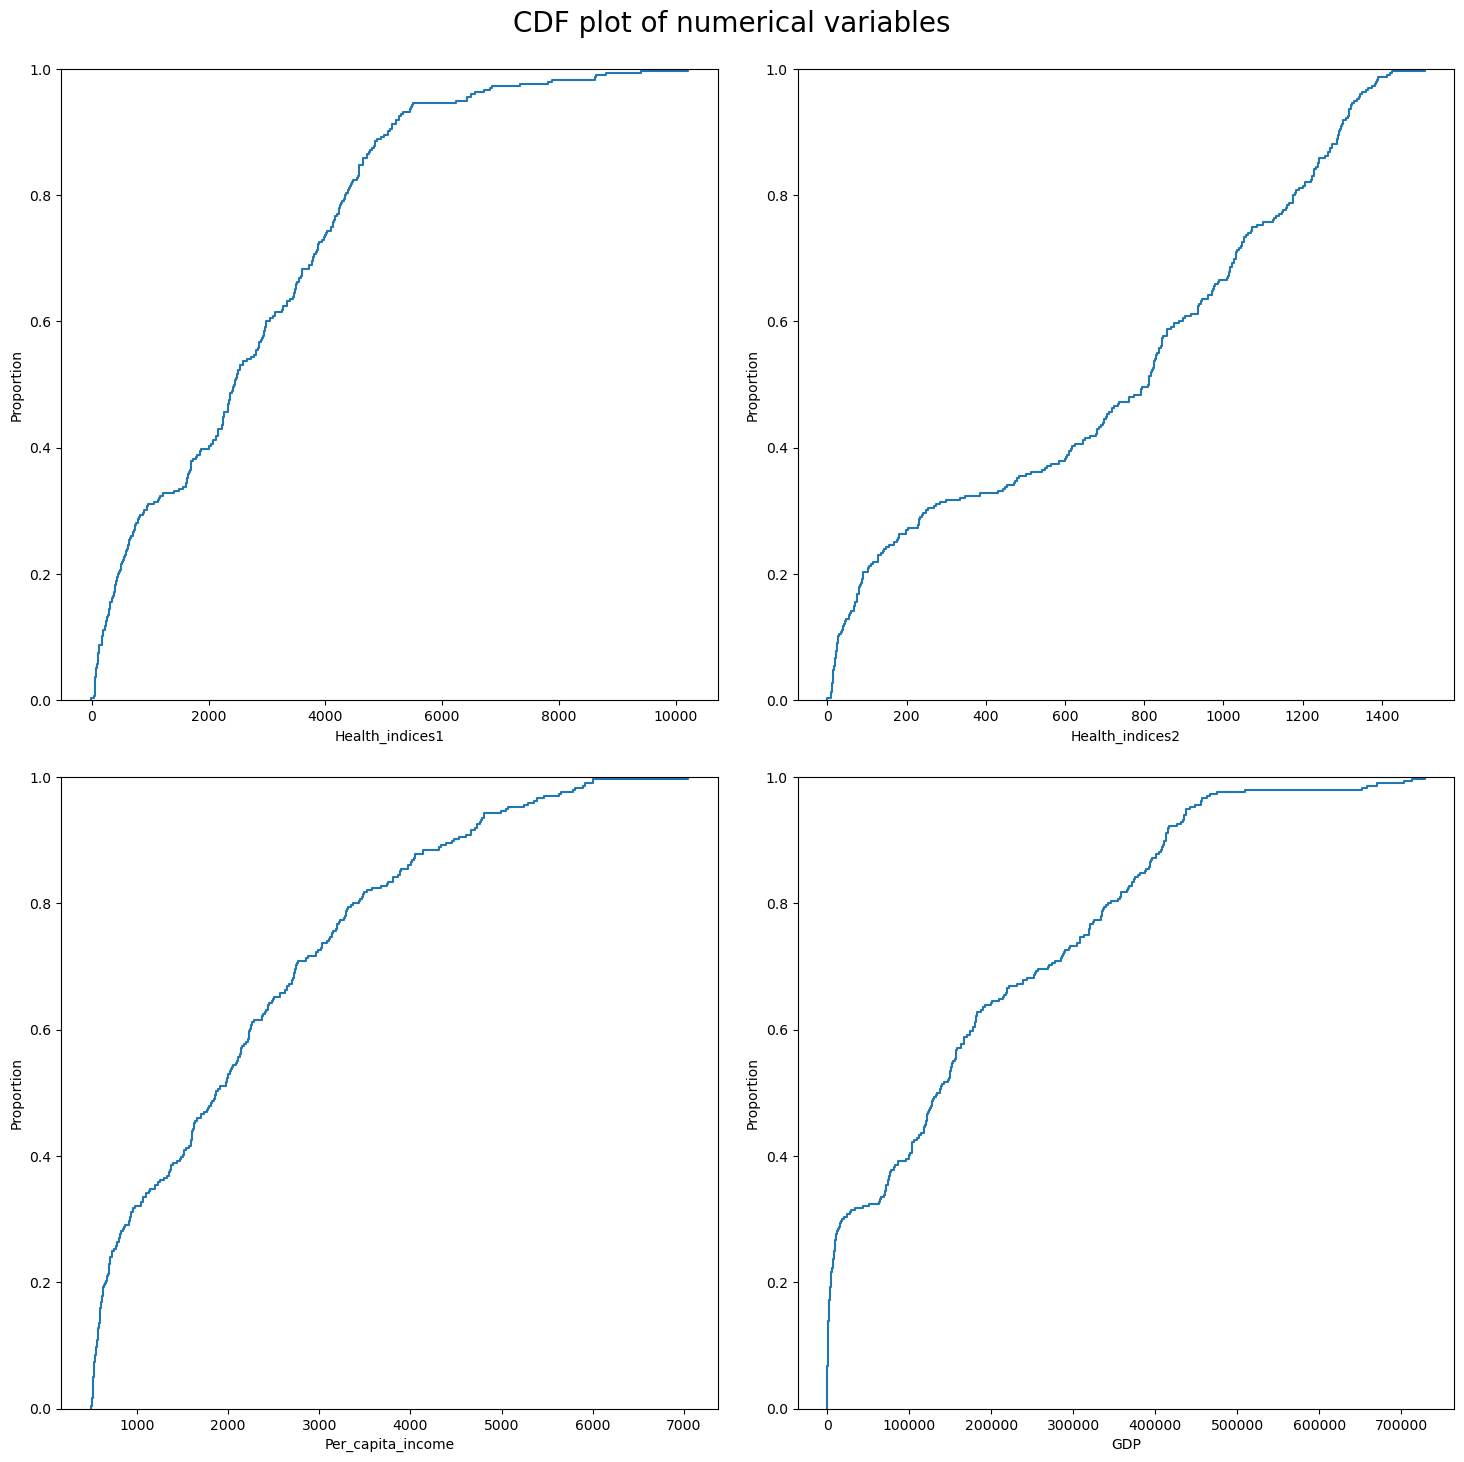

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0
column_names = df.columns.tolist()  # Get the list of column names

for ii in range(3):
    if counter < len(column_names):  # Check if the counter is within the list range
        sns.ecdfplot(data=df, ax=axes[ii][0], x=column_names[counter])
        counter += 1

    if counter < len(column_names):  # Check again before accessing the next column
        sns.ecdfplot(data=df, ax=axes[ii][1], x=column_names[counter])
        counter += 1

fig.tight_layout(pad=2.0)
plt.savefig("output.jpg", bbox_inches='tight')

In [64]:
df.skew().sort_values(ascending=False)

GDP                  0.826397
Per_capita_income    0.818014
Health_indices1      0.715652
Health_indices2     -0.173267
dtype: float64

**Observations**


### Bivariate Analysis

**Let's check for correlations.**

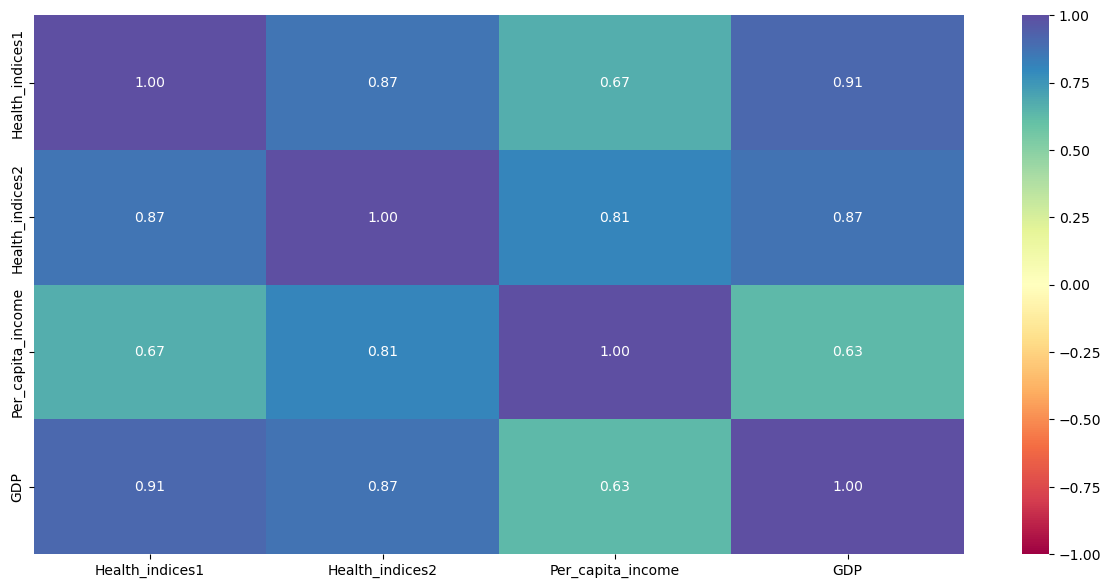

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [66]:
c= df.corr().abs()# Since there may be positive as well as -ve correlation 
s= c.unstack() #
so= s.sort_values(ascending=False) # Sorting according to the correlation 
so=so[(so<1) &  (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping d 
so.columns= ['correlation']
so

,,correlation
Health_indices1,GDP,0.907190
Health_indices2,GDP,0.869464
Health_indices1,Health_indices2,0.866421
Health_indices2,Per_capita_income,0.811987
Health_indices1,Per_capita_income,0.669226
Per_capita_income,GDP,0.629372


**Observations**

-

**Pair plot**

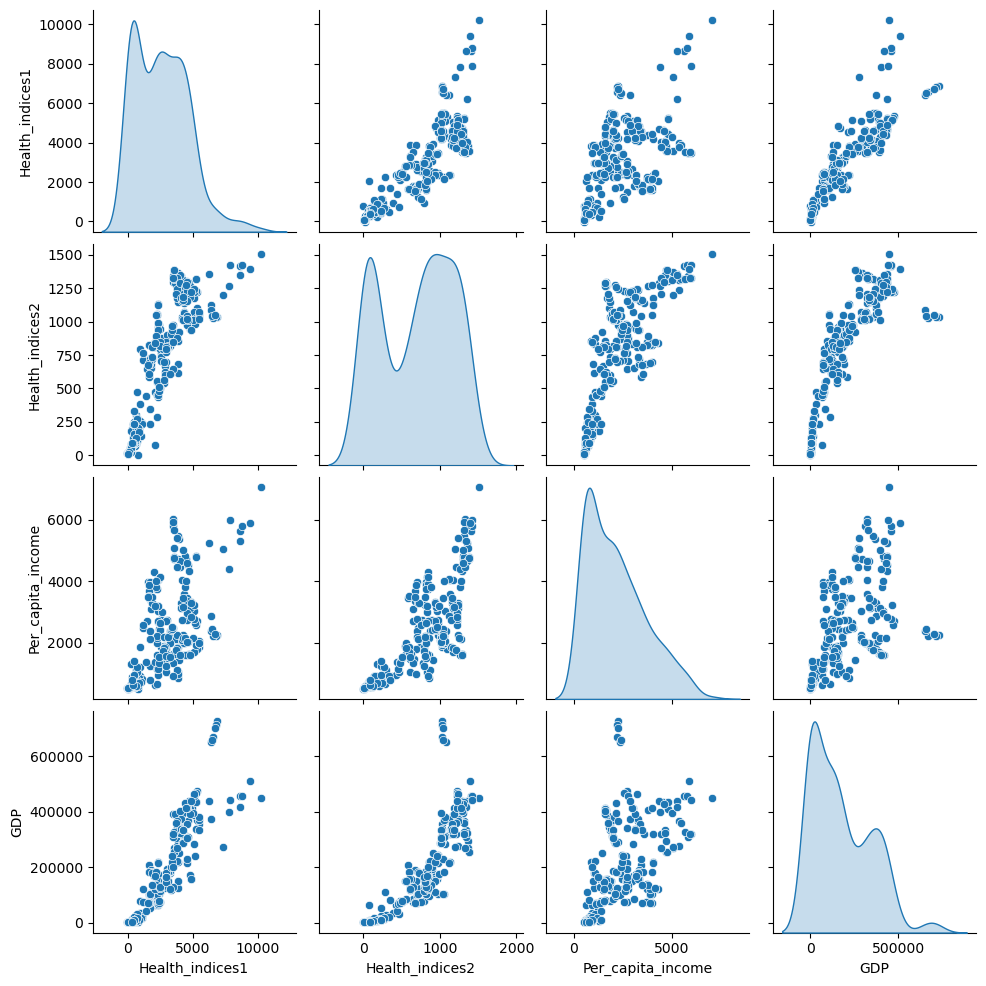

<Figure size 640x480 with 0 Axes>

In [67]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [68]:
df.corr().T

,Health_indices1,Health_indices2,Per_capita_income,GDP
Health_indices1,1.000000,0.866421,0.669226,0.907190
Health_indices2,0.866421,1.000000,0.811987,0.869464
Per_capita_income,0.669226,0.811987,1.000000,0.629372
GDP,0.907190,0.869464,0.629372,1.000000


**Observations**

-


**We can add a hue and see if we can see some clustered distributions.**

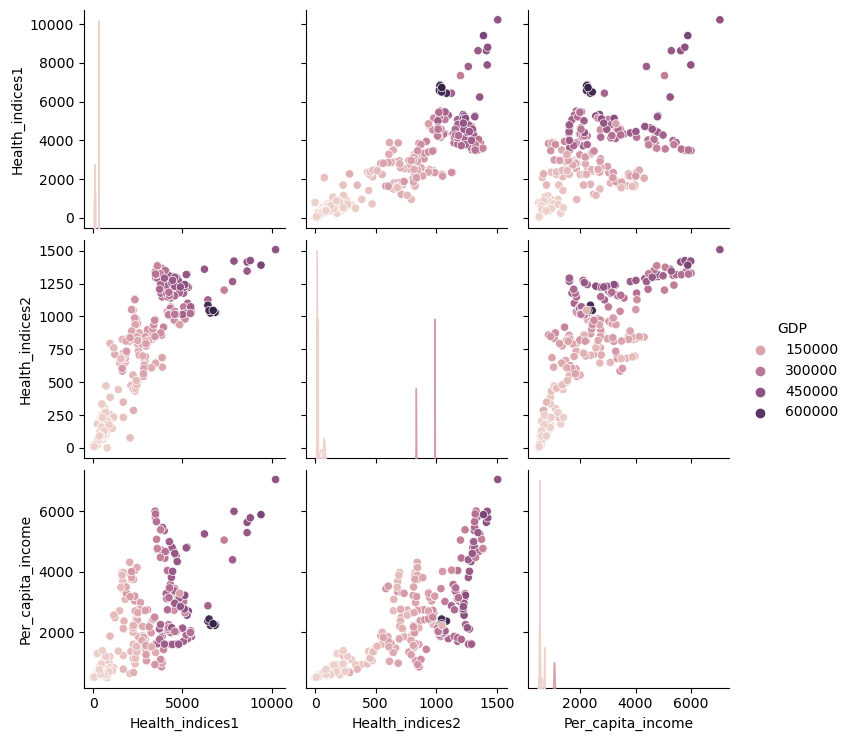

<Figure size 640x480 with 0 Axes>

In [69]:
sns.pairplot(
    data=df[
        [
            "Health_indices1",
            "Health_indices2",
            "Per_capita_income",
            "GDP",
        ]
    ],
    hue="GDP",
)

plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [70]:
c= df.corr().abs() # Since there may be positive as well as -ve correlation
s= c.unstack() 
so= s.sort_values(ascending=False) # Sorting according to the correlation 
so=so[(so<1) &  (so>0.3)].drop_duplicates().to_frame() # Due to symmetry..  
so.columns= ['correlation'] 
so

,,correlation
Health_indices1,GDP,0.907190
Health_indices2,GDP,0.869464
Health_indices1,Health_indices2,0.866421
Health_indices2,Per_capita_income,0.811987
Health_indices1,Per_capita_income,0.669226
Per_capita_income,GDP,0.629372


**Observations**



**Let's visualize the modes of contacting the bank in a 3D plot.**

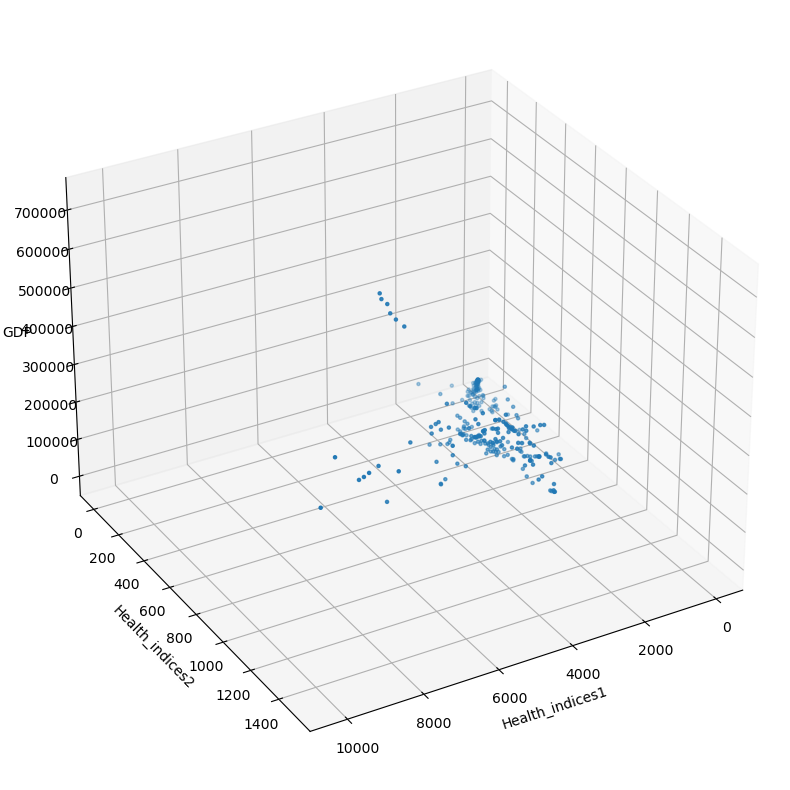

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Health_indices1"]
y = df["Health_indices2"]
z = df["GDP"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Health_indices1")
ax.set_ylabel("Health_indices2")
ax.set_zlabel("GDP")
ax.view_init(azim=60)
plt.show()

**Observations**

## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score using the threshold you got in the above plot.

In [72]:
threshold = 3
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Health_indices1 : [8802, 9403, 10219]

 Health_indices2 : []

 Per_capita_income : [7049]

 GDP : [703190, 713295, 728575]


**Observations**


### Scaling

- Let's scale the data before we proceed with clustering.

In [73]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled

array([[-1.08524025, -1.33831491, -1.070054  , -1.03432719],
       [-0.5613099 , -0.10149315,  0.36911547, -0.60455514],
       [-0.9689748 , -0.84145375, -0.70791444, -0.88180504],
       ...,
       [ 0.31730362, -0.18039385, -0.42759158, -0.32624036],
       [ 0.40904049,  0.32712956, -0.82192134,  0.14768205],
       [-0.27432558,  0.30793749,  0.68364039, -0.04756065]])

In [74]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,-1.085240,-1.338315,-1.070054,-1.034327
1,-0.561310,-0.101493,0.369115,-0.604555
2,-0.968975,-0.841454,-0.707914,-0.881805
3,-1.195619,-1.425745,-1.064018,-1.043738
4,-1.268714,-1.461997,-1.094197,-1.045102
...,...,...,...,...
291,0.399229,0.589421,0.227613,0.382391
292,0.163755,0.211977,-0.605308,-0.071108
293,0.317304,-0.180394,-0.427592,-0.326240
294,0.409040,0.327130,-0.821921,0.147682


In [75]:
## Scaling of Data, 
from scipy.stats import zscore 
clean_dataset_Scaled=df.apply(zscore) 
clean_dataset_Scaled.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,-1.085240,-1.338315,-1.070054,-1.034327
1,-0.561310,-0.101493,0.369115,-0.604555
2,-0.968975,-0.841454,-0.707914,-0.881805
3,-1.195619,-1.425745,-1.064018,-1.043738
4,-1.268714,-1.461997,-1.094197,-1.045102


## Hierarchical Clustering

In [81]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [82]:
# Calculate linkage using different methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}
for method in methods:
    linkage_matrix = linkage(df, method=method)                           ## Complete the code to apply different linkage on the data
    linkage_matrices[method] = linkage_matrix

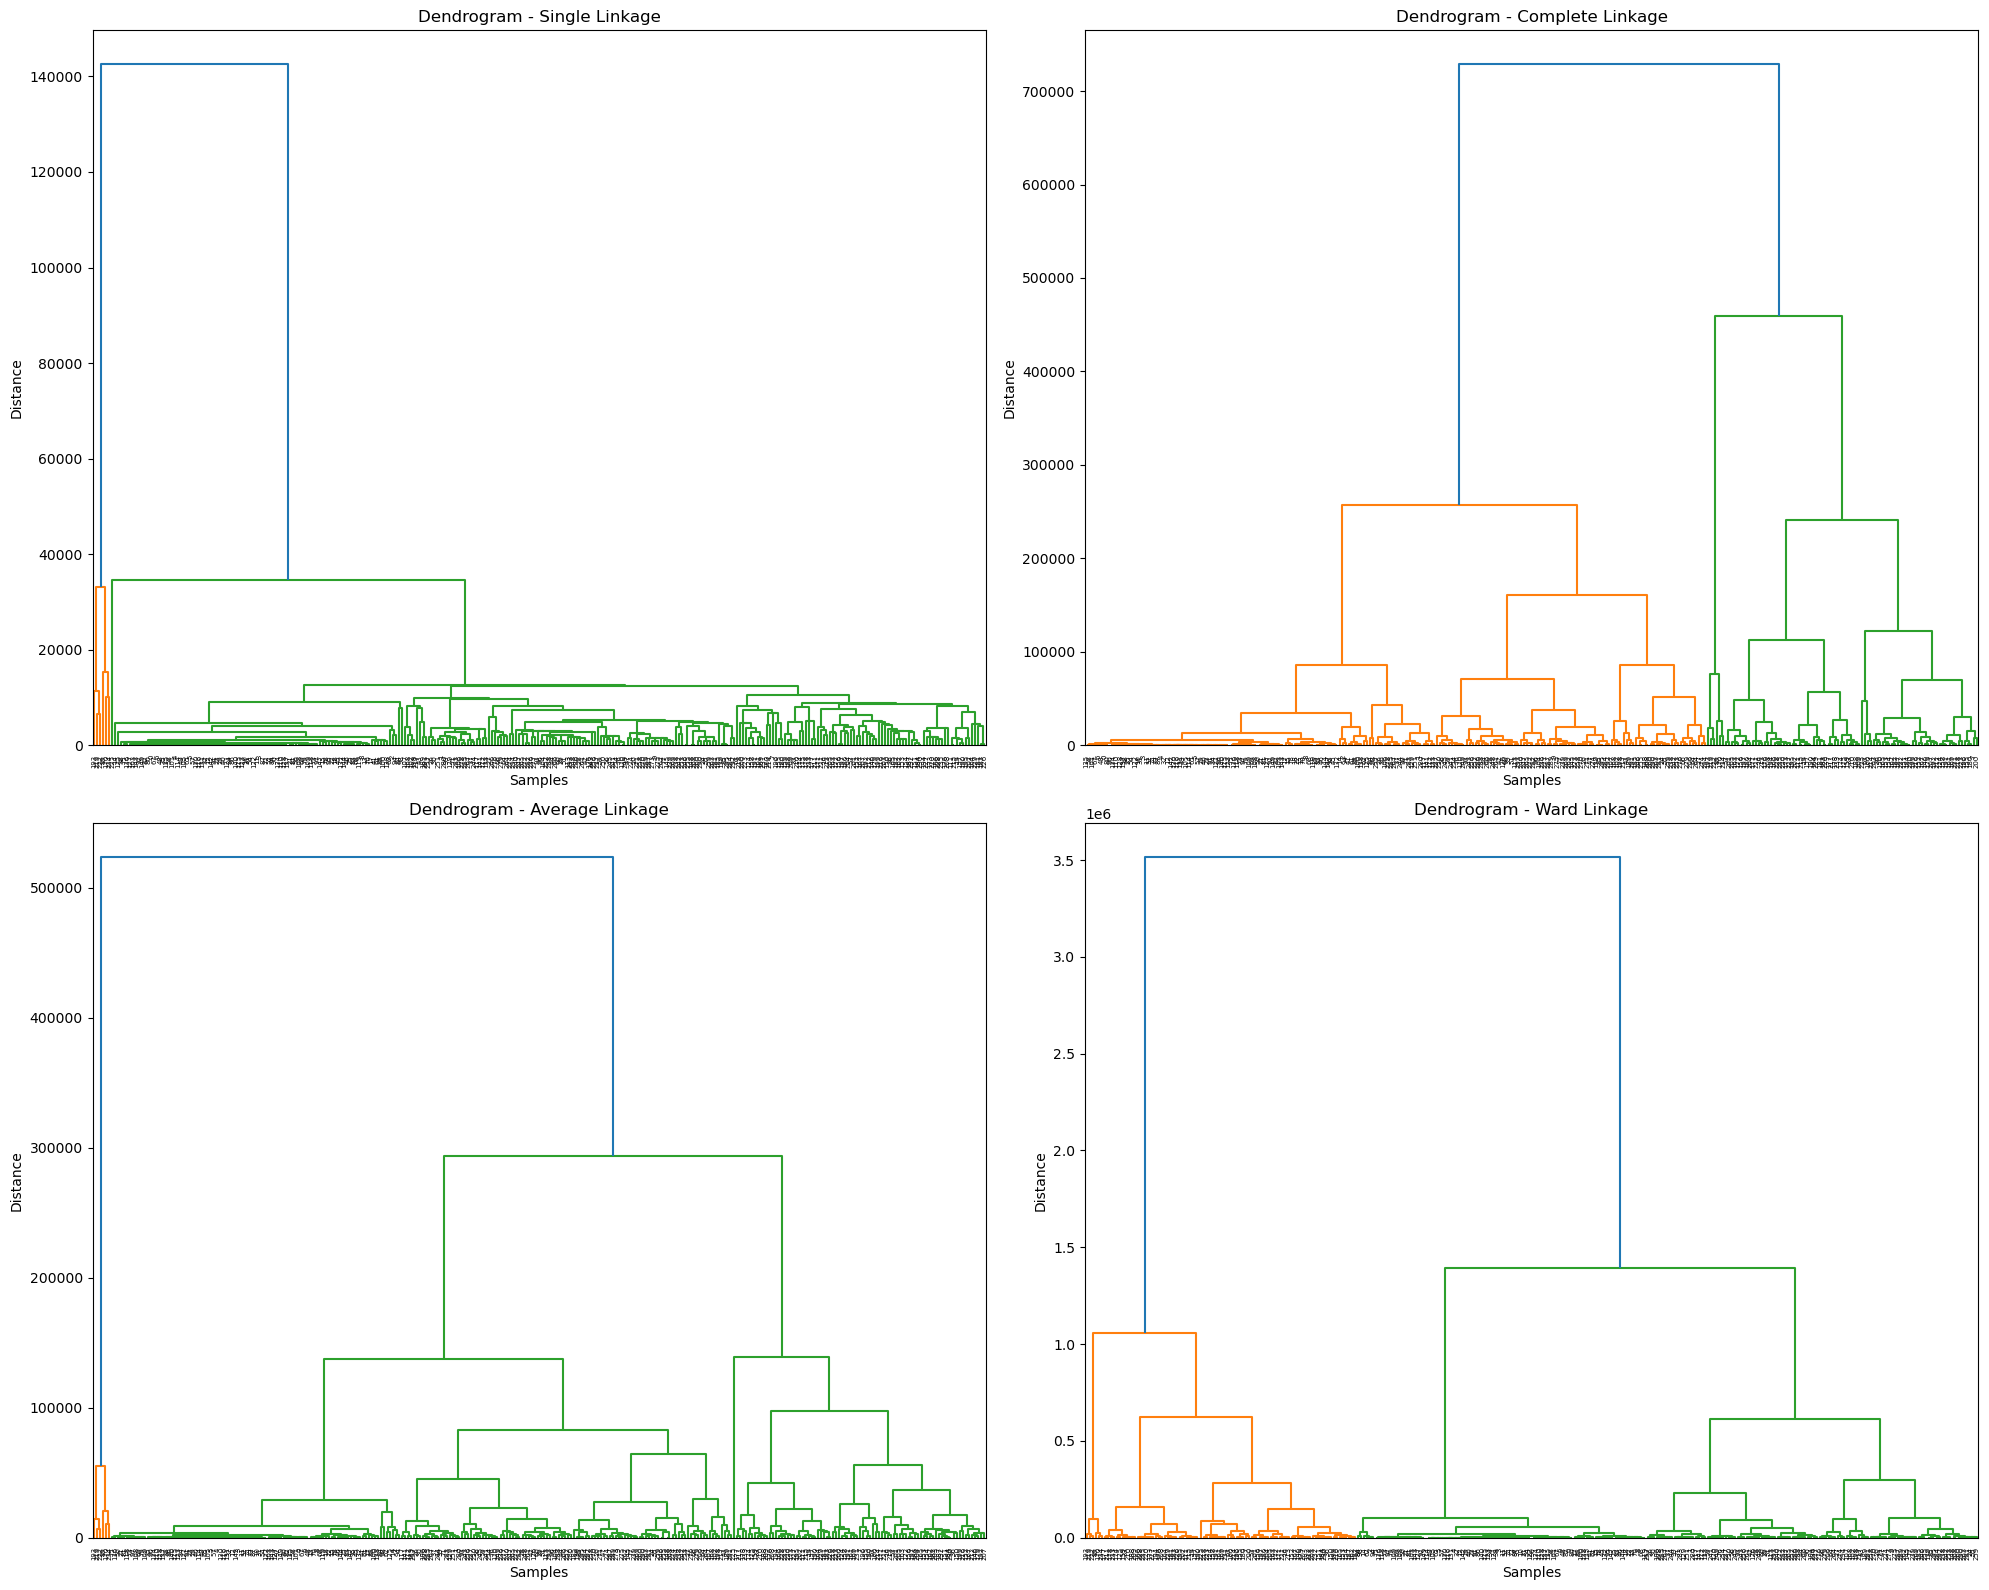

<Figure size 640x480 with 0 Axes>

In [83]:
plt.figure(figsize=(20, 16))
for method, linkage_matrix in linkage_matrices.items():
    plt.subplot(2, 2, methods.index(method) + 1)
    dendrogram(linkage_matrix, orientation='top')                                ## Complete the code to add linkage_matrix
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()
plt.savefig("output.jpg")

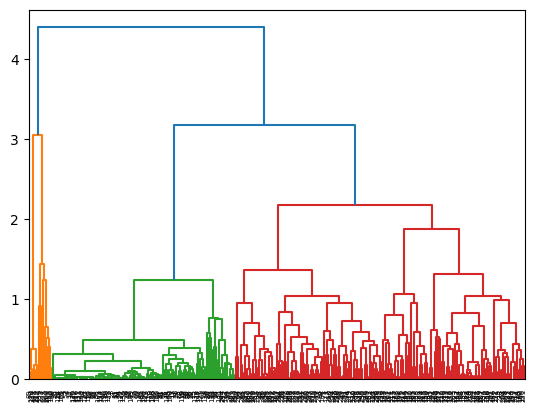

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Choosing average linkage method  
link_method= linkage(clean_dataset_Scaled, method= 'average') 
dend= dendrogram(link_method)

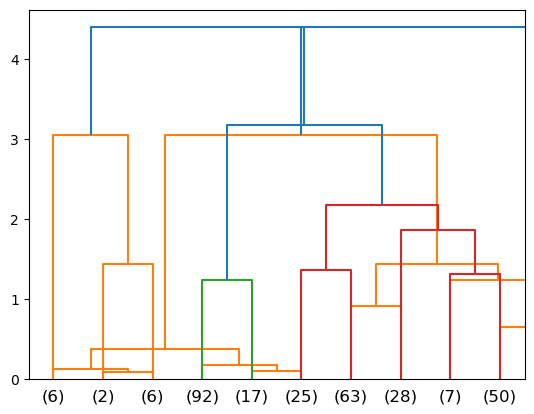

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Choosing average linkage method  link_method= linkage(clean_dataset_Scaled, method= 'average') 
dend= dendrogram(link_method) #Cutting the Dendrogram with suitable clusters 
dend= dendrogram(link_method, truncate_mode='lastp', p= 10) 

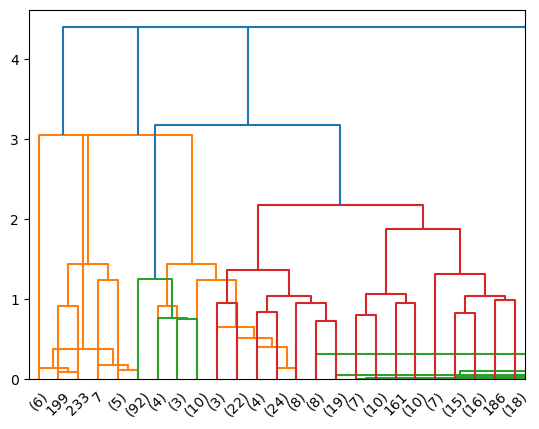

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Choosing average linkage method  link_method= linkage(clean_dataset_Scaled, method= 'average') 
dend= dendrogram(link_method) #Cutting the Dendrogram with suitable clusters 
dend= dendrogram(link_method, truncate_mode='lastp', p= 25) 

In [87]:
# Importing fcluster module to create clusters 
from scipy.cluster.hierarchy import fcluster # Set criterion as maxclust,then create 3 clusters, and store the result in another
clusters_3= fcluster(link_method, 3, criterion='maxclust') 
clusters_3

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [88]:
clusters_3_dataset=df.copy()

In [89]:
cluster3_dataset['clusters-3'] = clusters_3

NameError: name 'cluster3_dataset' is not defined

In [90]:
cluster3_dataset.head()

NameError: name 'cluster3_dataset' is not defined

**Observations**

In [91]:
linkage_matrix_ward = linkage(df, method='ward')                        ## Complete the code to apply to the best linkage you got from the above dendrogram
max_d = 7  # Maximum distance threshold for forming clusters
clusters = fcluster(linkage_matrix_ward, t=max_d, criterion='distance')              ## Complete the code to apply linkage_matrix_ward

num_clusters = len(np.unique(clusters))
print(f"Number of clusters determined using Ward linkage: {num_clusters}")

Number of clusters determined using Ward linkage: 292


#### Lets check silhouette score

In [103]:
from sklearn.cluster import AgglomerativeClustering
hc_df = subset_scaled_df.copy()
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5362182000947584
For n_clusters = 3, silhouette score is 0.5214876308115696
For n_clusters = 4, silhouette score is 0.5059966784091774
For n_clusters = 5, silhouette score is 0.5326070186102602
For n_clusters = 6, silhouette score is 0.5253180820121315
For n_clusters = 7, silhouette score is 0.5477771423586254
For n_clusters = 8, silhouette score is 0.527926250016339
For n_clusters = 9, silhouette score is 0.5154033217352417


**From the above score, find the appropriate number of clusters to build the model**

### Creating final model

In [93]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")    ## Complete the code to add the appropriate number of clusters
HCmodel.fit(hc_df)

CPU times: total: 15.6 ms
Wall time: 7.98 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [94]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [95]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [96]:
HCmodel.labels_

array([2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## K-means Clustering

In [104]:
k_means_df = subset_scaled_df.copy()

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [106]:
wss =[]
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

In [107]:
wss

[1276.5101351351352,
 482.1559255714835,
 276.2561392867222,
 199.1581672071259,
 160.47211144131273,
 128.76075478370933,
 100.00058012667091,
 82.15003059375553,
 72.23197345325109,
 64.25547258255443]

### Checking Elbow Plot

Text(0, 0.5, 'WSS')

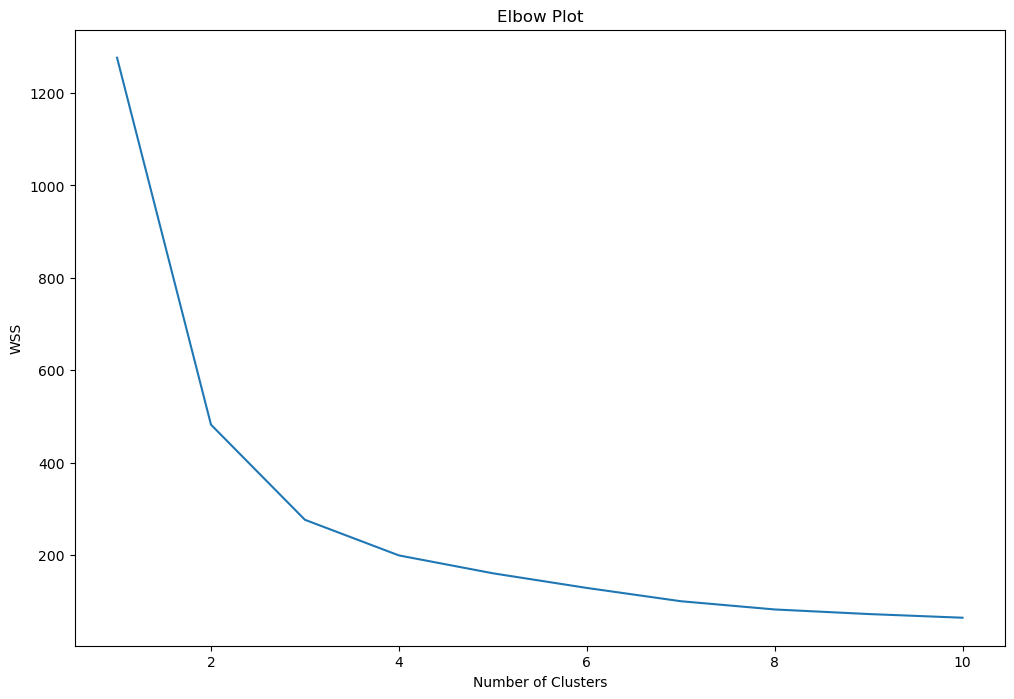

In [108]:
plt.figure(figsize=(12,8))
plt.plot(a, wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

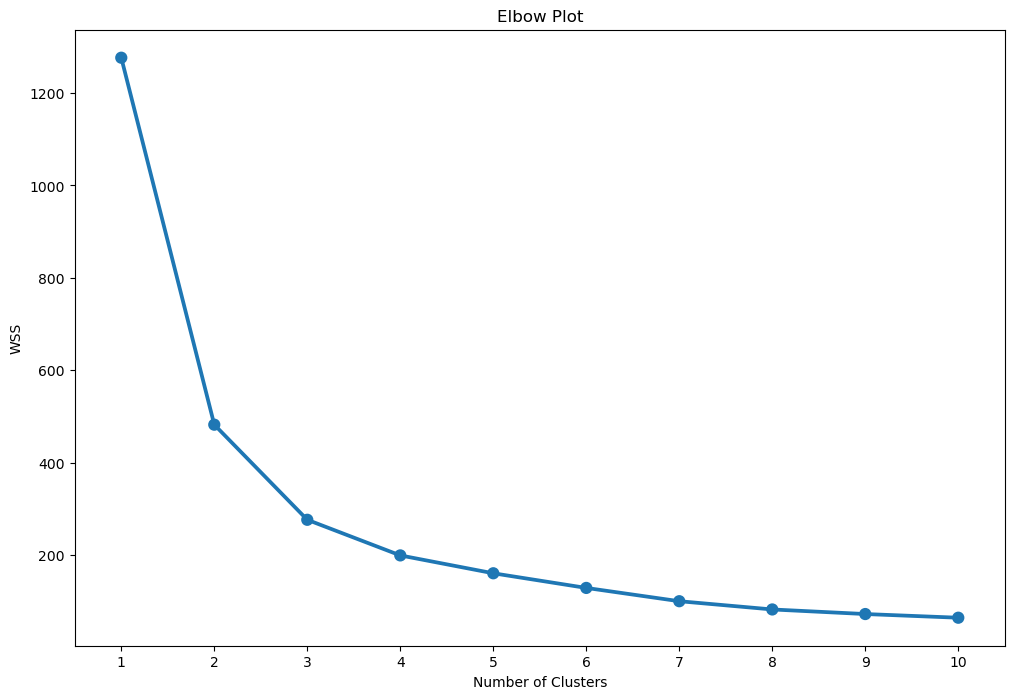

<Figure size 640x480 with 0 Axes>

In [109]:
# Create a DataFrame from 'a' and 'wss'
data = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Plot the data using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(data=data, x='Number of Clusters', y='WSS')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### Checking Silhouette Scores

In [110]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)                 ## Complete the code to apply KMeans
 y=clusterer.fit_predict(k_means_df)                                                          ## Complete the code to predict on k_means_df
 s =silhouette_score(k_means_df, y )                                                          ## Complete the code to get the silhouette score of k_means_df
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.5671
The Average Silhouette Score for 3 clusters is 0.53477
The Average Silhouette Score for 4 clusters is 0.55527
The Average Silhouette Score for 5 clusters is 0.56204
The Average Silhouette Score for 6 clusters is 0.58121
The Average Silhouette Score for 7 clusters is 0.55049
The Average Silhouette Score for 8 clusters is 0.53255
The Average Silhouette Score for 9 clusters is 0.51682
The Average Silhouette Score for 10 clusters is 0.49929


**From the silhouette scores, find which k value has highest value and have elbow in elbow curve.**

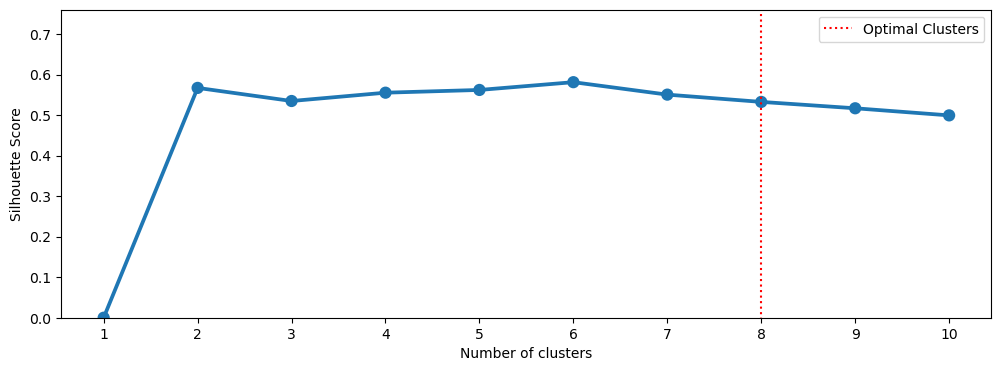

<Figure size 640x480 with 0 Axes>

In [111]:
# Create a DataFrame from the dictionary
data_df = pd.DataFrame(list(ss.items()), columns=['Number of clusters', 'Silhouette Score'])

# Plot the data using sns.pointplot
maxkey = data_df['Silhouette Score'].idxmax() + 2  # Find the key with the maximum Silhouette Score
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data_df, x='Number of clusters', y='Silhouette Score', ax=ax)
plt.vlines(x=maxkey, ymax=0, ymin=0.75, linestyles='dotted', color='red', label='Optimal Clusters')
ax.set(ylim=(0, 0.76))
plt.legend()
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [112]:
optimal_clusters = maxkey

kmeans = KMeans(n_clusters = optimal_clusters , init = 'k-means++', random_state = 1)          ## Complete the code apply KMeans with appropriate number of clusters which you got from above plots

kmeans.fit_predict(k_means_df)                                                         ## Complete the code to predict the KMeans on k_means_df

array([0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 4, 4, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 4, 0, 0, 4, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 4, 0, 0, 2, 2, 0, 0, 1, 4, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 2, 0, 4, 2, 0, 0,
       0, 5, 2, 4, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 5, 0, 4, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 4, 1, 0, 2, 0, 5, 1, 1, 1,
       1, 3, 1, 5, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 5, 5, 6, 5, 1, 1, 1, 5,
       1, 5, 5, 1, 3, 5, 1, 1, 1, 2, 1, 5, 1, 1, 5, 5, 5, 6, 1, 5, 1, 1,
       5, 3, 3, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5, 6,
       1, 1, 6, 1, 2, 3, 1, 1, 1, 1, 1, 1, 5, 3, 6, 1, 4, 2, 2, 4, 2, 4,
       4, 2, 0, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 0, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 4])

In [113]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [114]:
df1.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,K_means_segments
0,417,66,564,1823,2,0
1,1485,646,2710,73662,1,4
2,654,299,1104,27318,2,0
3,192,25,573,250,2,0
4,43,8,528,22,2,0


### Cluster Profiling

In [115]:
df1.K_means_segments.value_counts()                  ## Find the value_counts of each of the K_means_segments

0    103
2     56
1     54
4     41
5     28
3      8
6      6
Name: K_means_segments, dtype: int64

In [116]:
df1.K_means_segments

0      0
1      4
2      0
3      0
4      0
      ..
291    2
292    2
293    2
294    2
295    4
Name: K_means_segments, Length: 296, dtype: int32

In [117]:
clust_profile=df1
clust_profile=clust_profile.groupby('K_means_segments').mean()
clust_profile['freq']=df1.K_means_segments.value_counts().sort_index()
np.round(clust_profile,2)

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,freq
K_means_segments,,,,,,
0,533.02,123.12,704.70,10643.08,2.00,103
1,4589.00,1150.06,2386.81,361216.91,1.00,54
2,2987.20,770.80,1862.79,146928.66,1.11,56
3,8589.38,1371.00,5635.25,425379.62,0.00,8
4,2026.44,812.54,3364.85,135153.78,1.00,41
5,4162.75,1314.61,4879.04,350573.29,1.00,28
6,6649.33,1044.00,2299.83,687649.67,0.00,6


In [118]:
#K-Means Clustering & Cluster Information 
kmeans1_dataset=df.copy() # Fitting K-Means to the dataset 
kmeans= KMeans(n_clusters= 3, init= 'k-means++', random_state= 42) 
y_kmeans= kmeans.fit_predict(clean_dataset_Scaled) #beginning of the cluster numbering with 1 instead of 0 
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1 # New Dataframe called cluster 
cluster= pd.DataFrame(y_kmeans1) # Adding cluster to the Dataset1 
kmeans1_dataset['cluster'] = cluster #Mean of clusters 
kmeans_mean_cluster= pd.DataFrame(kmeans1_dataset.groupby('cluster')).mean(),1
kmeans_mean_cluster

(0    2.0
 dtype: float64,
 1)

**Observations**

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [119]:
km_cluster_profile = df1.groupby("K_means_segments").mean()        ## Complete the code to group the data using K_means_segments

In [120]:
km_cluster_profile["count_in_each_segment"] = (df1.groupby("K_means_segments")["Per_capita_income"].count().values)

In [121]:
km_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,533.019417,123.116505,704.699029,10643.077670,2.000000,103
1,4589.000000,1150.055556,2386.814815,361216.907407,1.000000,54
2,2987.196429,770.803571,1862.785714,146928.660714,1.107143,56
3,8589.375000,1371.000000,5635.250000,425379.625000,0.000000,8
4,2026.439024,812.536585,3364.853659,135153.780488,1.000000,41
5,4162.750000,1314.607143,4879.035714,350573.285714,1.000000,28
6,6649.333333,1044.000000,2299.833333,687649.666667,0.000000,6


**Observations**

### Cluster Profiling: Hierarchical Clustering

In [122]:
hc_cluster_profile = df2.groupby("HC_segments")["Per_capita_income"].mean()         ## Complete the code to group the data using K_means_segments

In [123]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Per_capita_income"].count().values
)

In [124]:
hc_cluster_profile

HC_segments
0                           4205.785714
1                           2880.890173
2                            751.981651
count_in_each_segment    [14, 173, 109]
Name: Per_capita_income, dtype: object

**Observations**

### K-means vs Hierarchical Clustering

In [125]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,533.019417,123.116505,704.699029,10643.077670,2.000000,103
1,4589.000000,1150.055556,2386.814815,361216.907407,1.000000,54
2,2987.196429,770.803571,1862.785714,146928.660714,1.107143,56
3,8589.375000,1371.000000,5635.250000,425379.625000,0.000000,8
4,2026.439024,812.536585,3364.853659,135153.780488,1.000000,41
5,4162.750000,1314.607143,4879.035714,350573.285714,1.000000,28
6,6649.333333,1044.000000,2299.833333,687649.666667,0.000000,6


In [126]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

AttributeError: 'Series' object has no attribute 'style'

<Axes: xlabel='K_means_segments'>

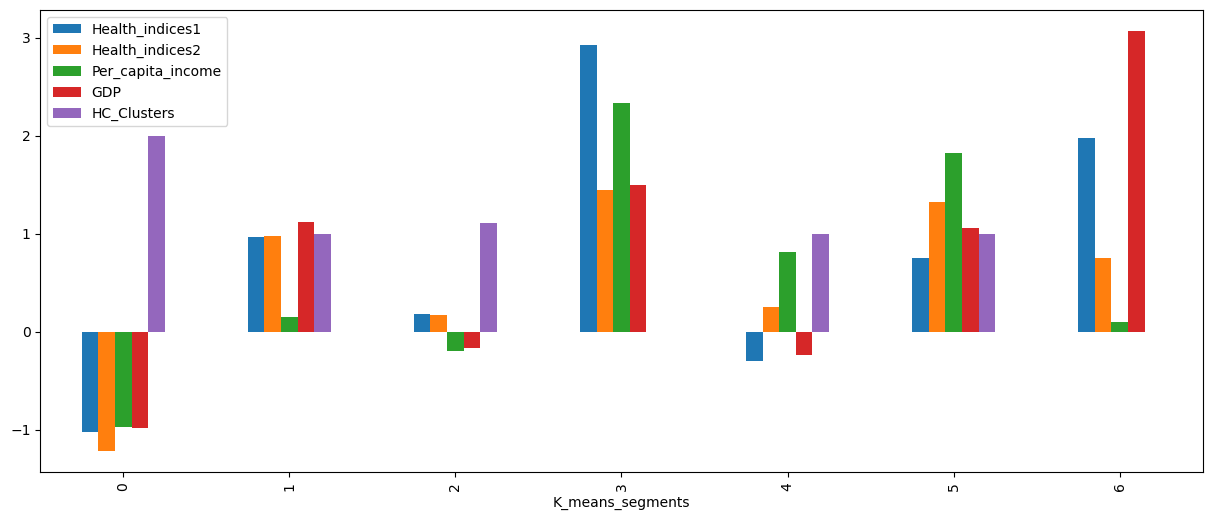

In [127]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_Clusters'>

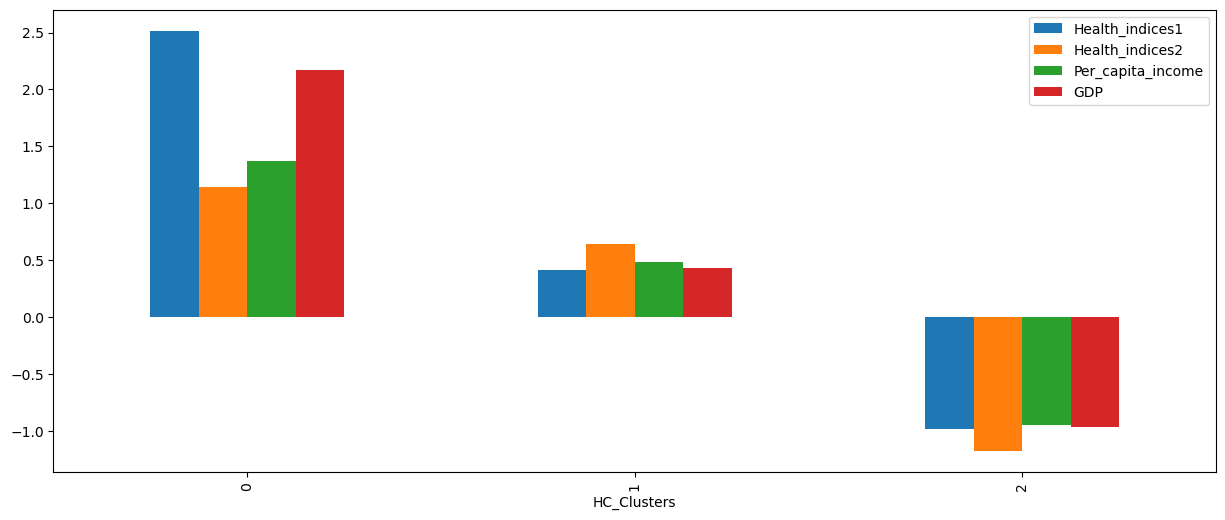

In [128]:
hc_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

**Observations**

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

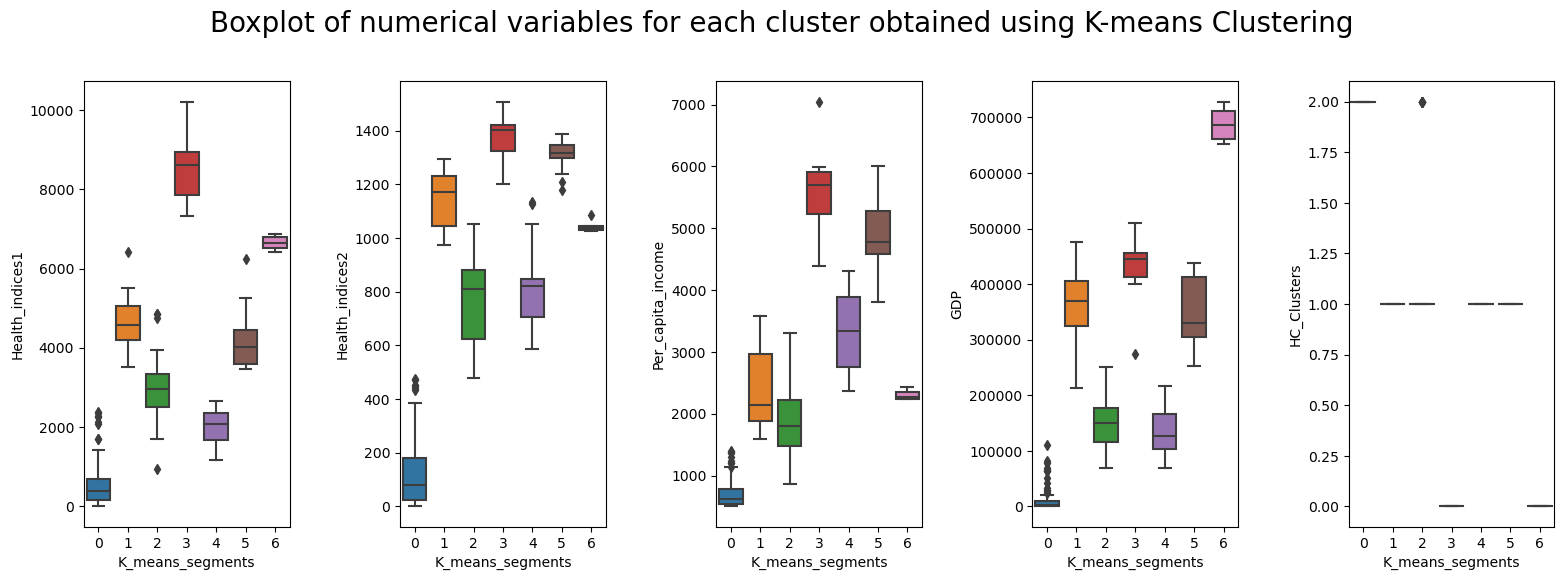

In [129]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)
plt.savefig("output.jpg", bbox_inches='tight')

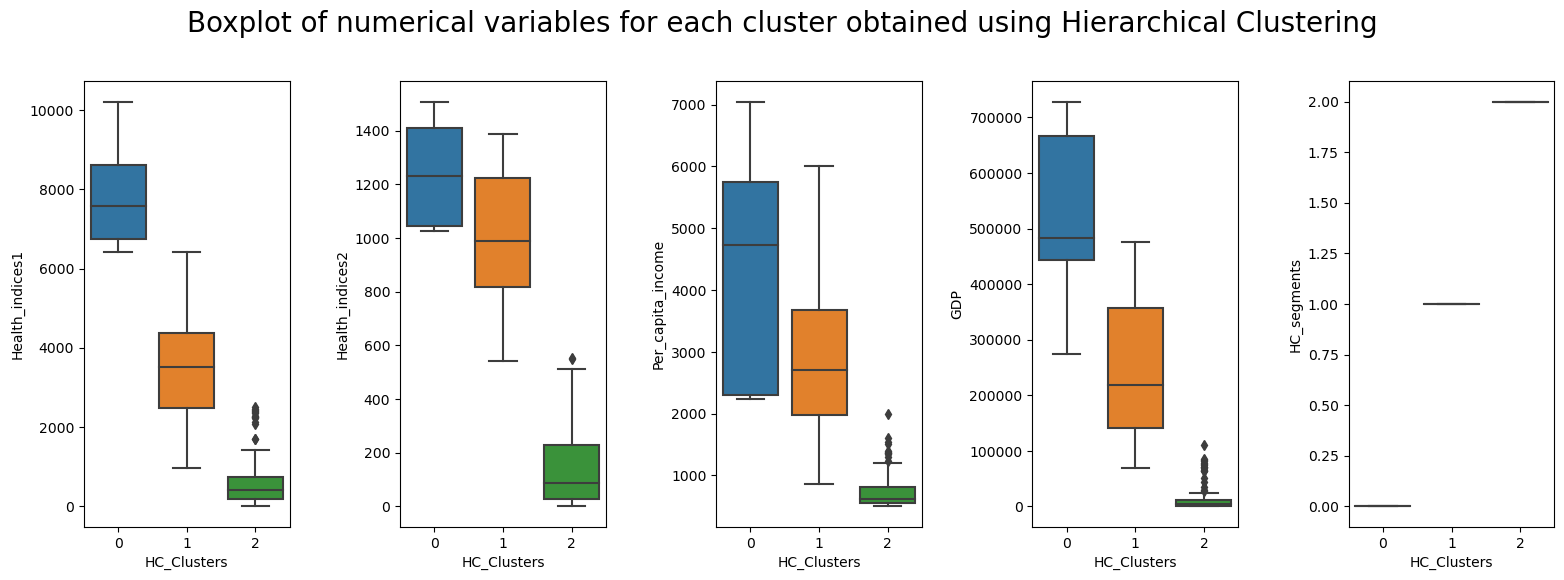

In [130]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)
plt.savefig("output.jpg", bbox_inches='tight')

## Actionable Insights and Recommendations

### Cluster Comparison

**Observations**



### Insights




### Business Recommendations



# PCA

## Problem Statement

### Context

The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.


### Objective

Apply Principal Component Analysis (PCA) on the 'Hair Salon.csv' dataset, which encompasses various variables related to a salon chain's market segmentation. The goal is to analyze and interpret the principal components


###  Data Description

1. ProdQual: Product Quality
2. Ecom: E-Commerce
3. TechSup: Technical Support
4. CompRes: Complaint Resolution
5. Advertising: Advertising
6. ProdLine: Product Line
7. SalesFImage: Salesforce Image
8. ComPricing: Competitive Pricing
9. WartyClaim: Warranty & Claims
10. OrdBilling: Order & Billing
11. DelSpeed: Delivery Speed
12. Satisfaction: Customer Satisfaction

## Loading the dataset

In [131]:
data = pd.read_csv('Hair Salon.csv')   ## Complete the code to read the dataset

In [132]:
data.head()               ## Complete the code to check the head

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [134]:
data.drop(['ID','Satisfaction'],axis=1, inplace = True)     ## Complete the code to drop the ID and Satisfaction columns

In [135]:
data.shape

(100, 11)

In [136]:
data.isnull().sum()

ProdQual       0
Ecom           0
TechSup        0
CompRes        0
Advertising    0
ProdLine       0
SalesFImage    0
ComPricing     0
WartyClaim     0
OrdBilling     0
DelSpeed       0
dtype: int64

In [137]:
data.nunique()

ProdQual       43
Ecom           27
TechSup        50
CompRes        45
Advertising    41
ProdLine       42
SalesFImage    35
ComPricing     45
WartyClaim     34
OrdBilling     37
DelSpeed       30
dtype: int64

In [138]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7


## Exploratory Data Analysis

### Univariate Analysis

#### `ProdQual`

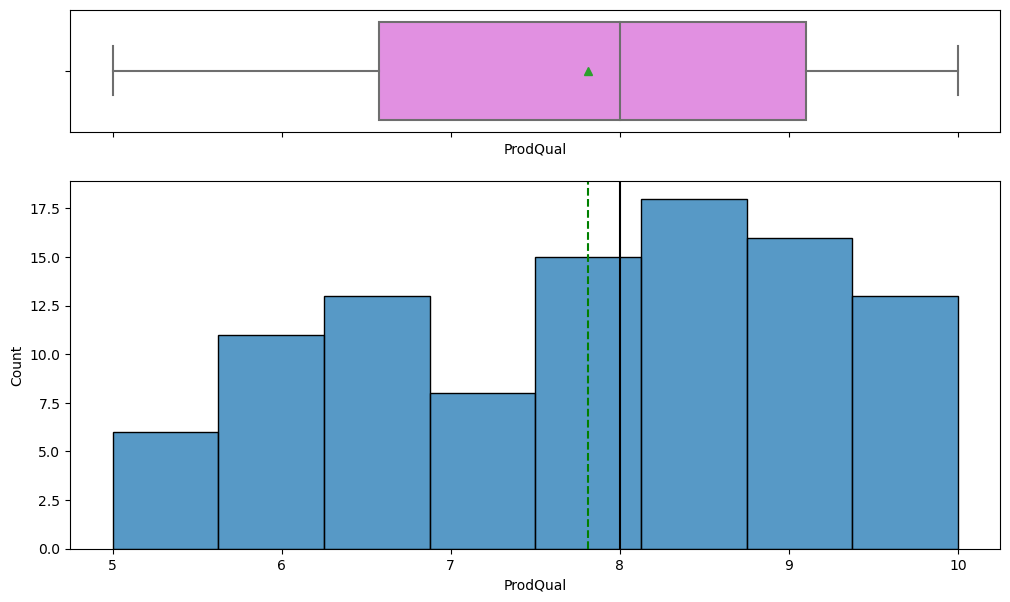

In [139]:
histogram_boxplot(data, 'ProdQual', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for ProdQual

#### `Ecom`

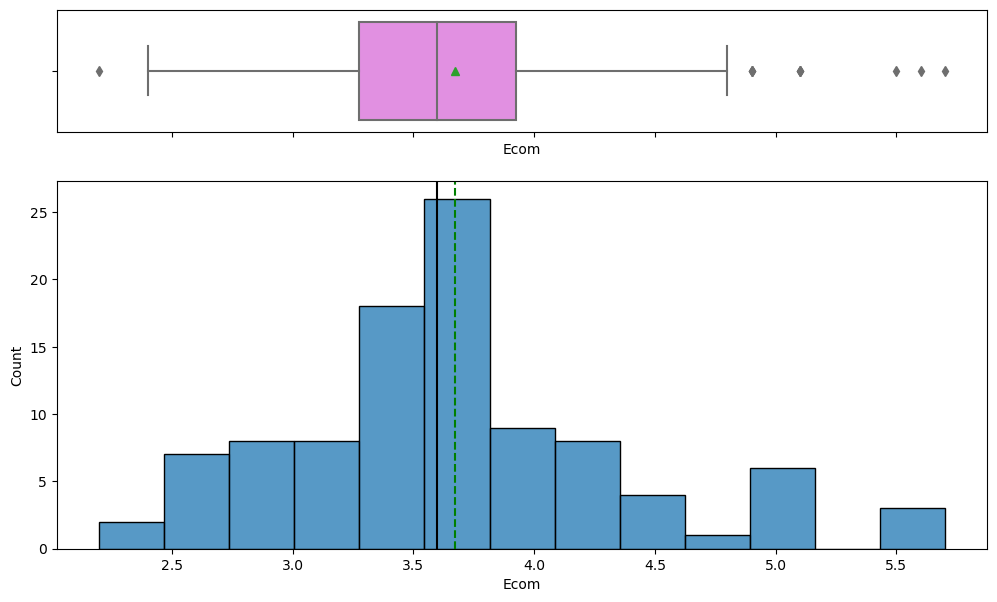

In [140]:
histogram_boxplot(data, 'Ecom', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for Ecom

#### `TechSup`

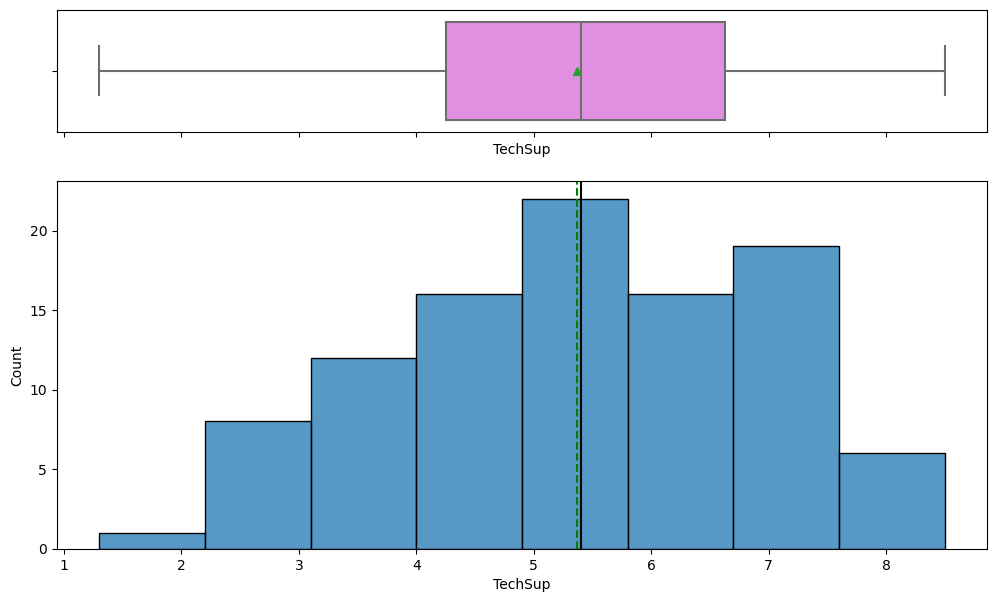

In [141]:
histogram_boxplot(data, 'TechSup', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for TechSup

#### `CompRes`

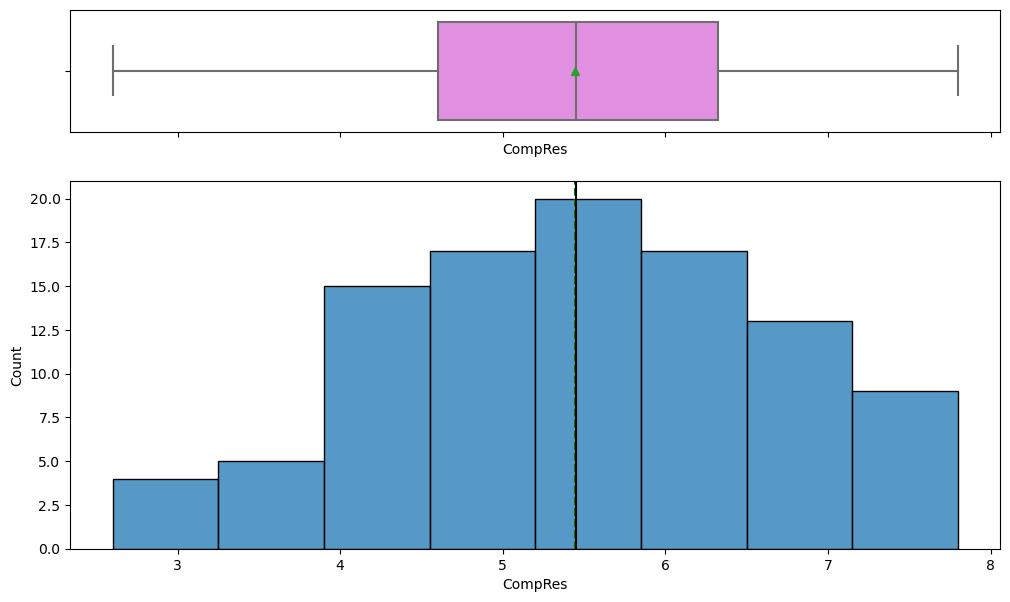

In [142]:
histogram_boxplot(data, 'CompRes', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for CompRes

#### `Advertising`

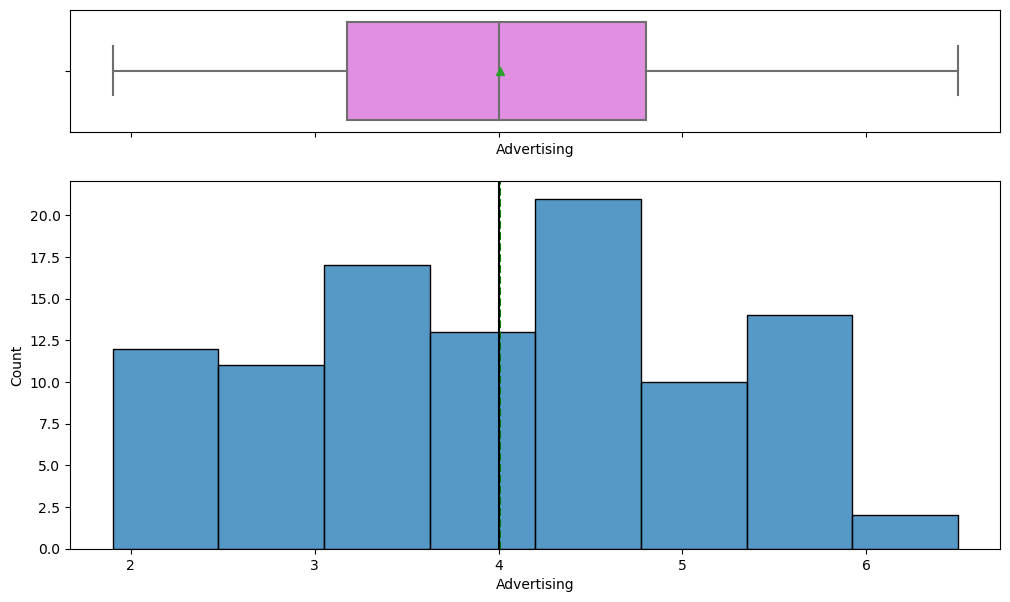

In [143]:
histogram_boxplot(data, 'Advertising', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for Advertising

#### `ProdLine`

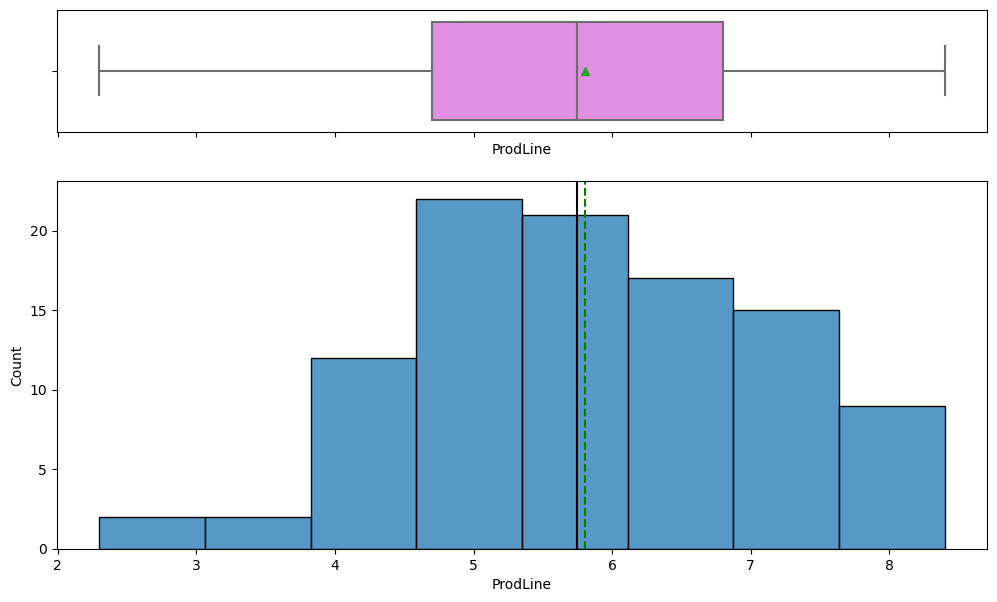

In [144]:
histogram_boxplot(data, 'ProdLine', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for ProdLine

#### `SalesFImage`

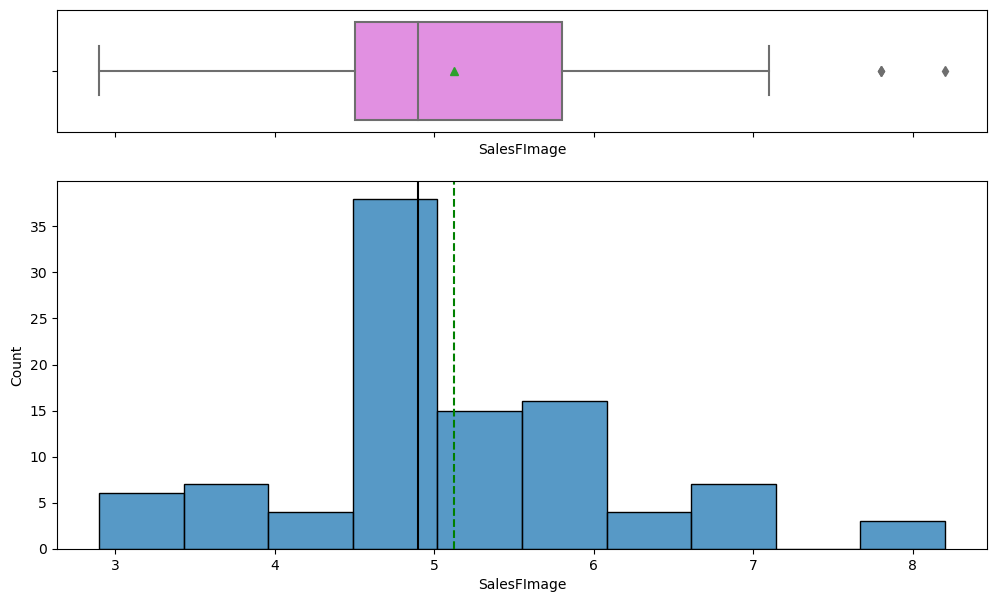

In [145]:
histogram_boxplot(data, 'SalesFImage', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for SalesFImage

#### `ComPricing`

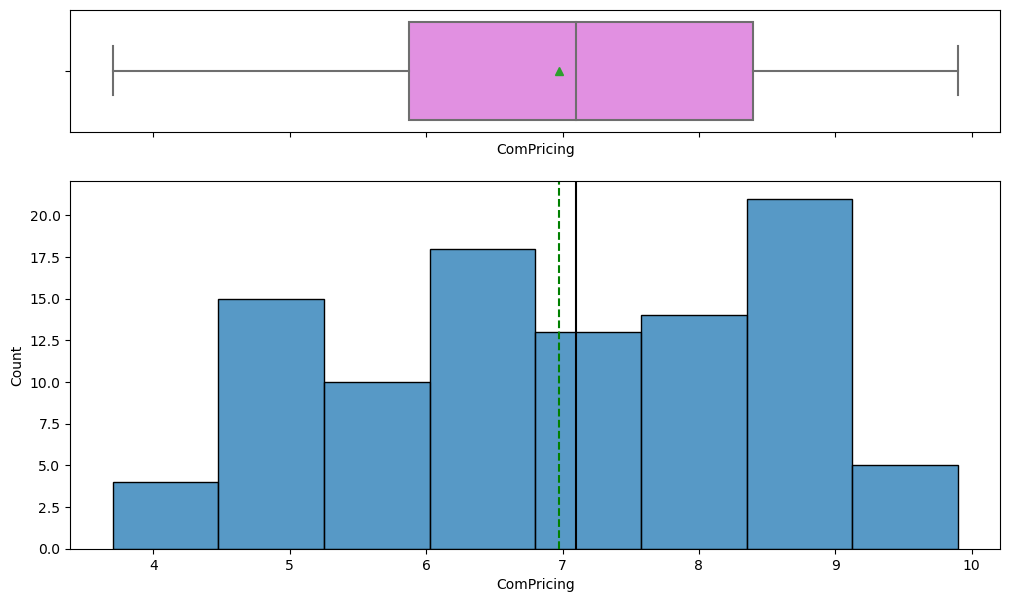

In [146]:
histogram_boxplot(data, 'ComPricing', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for ComPricing

#### `WartyClaim`

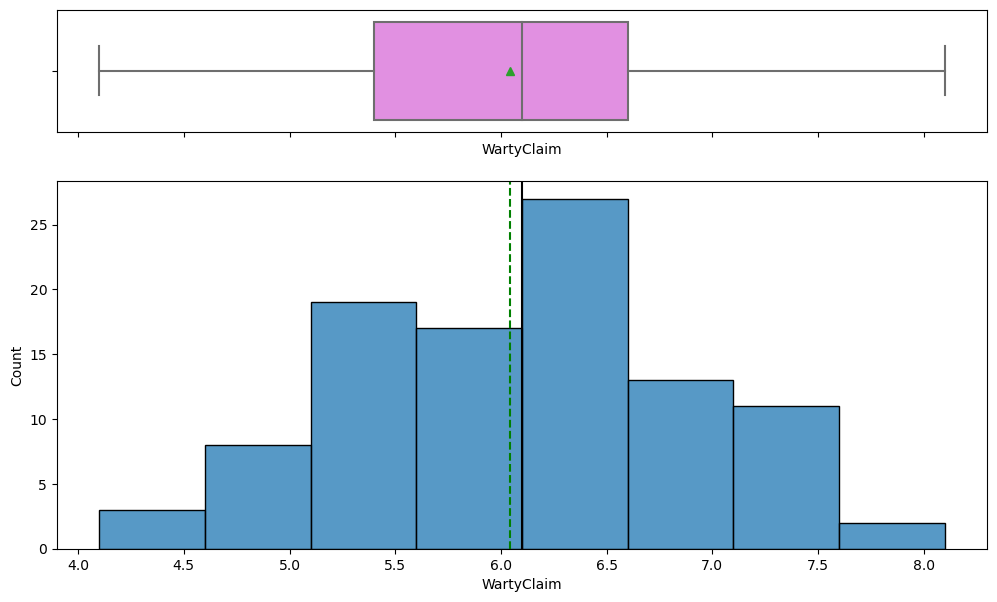

In [147]:
histogram_boxplot(data, 'WartyClaim', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for WartyClaim

#### `OrdBilling`

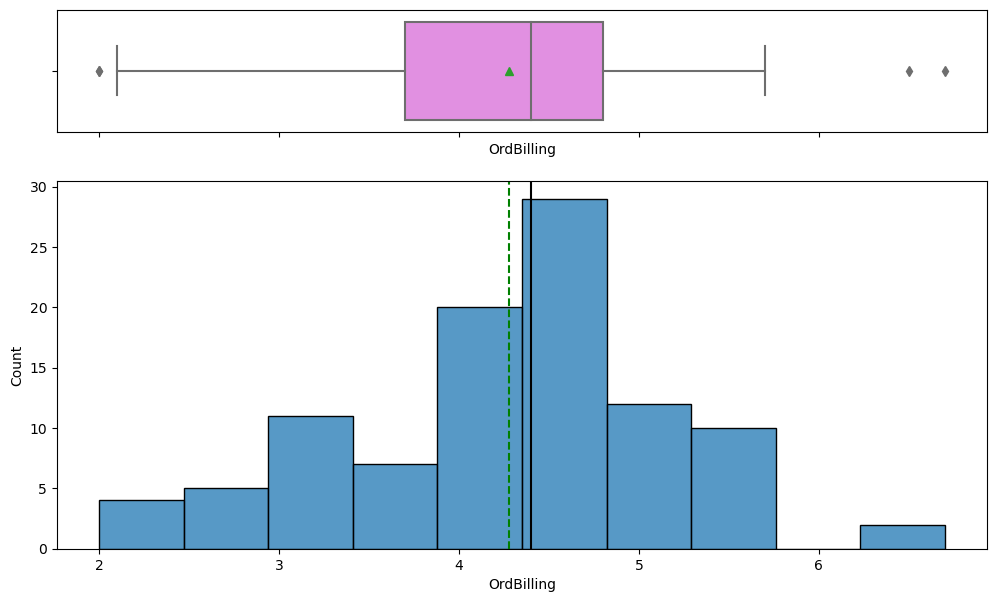

In [148]:
histogram_boxplot(data, 'OrdBilling', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for OrdBilling

#### `DelSpeed`

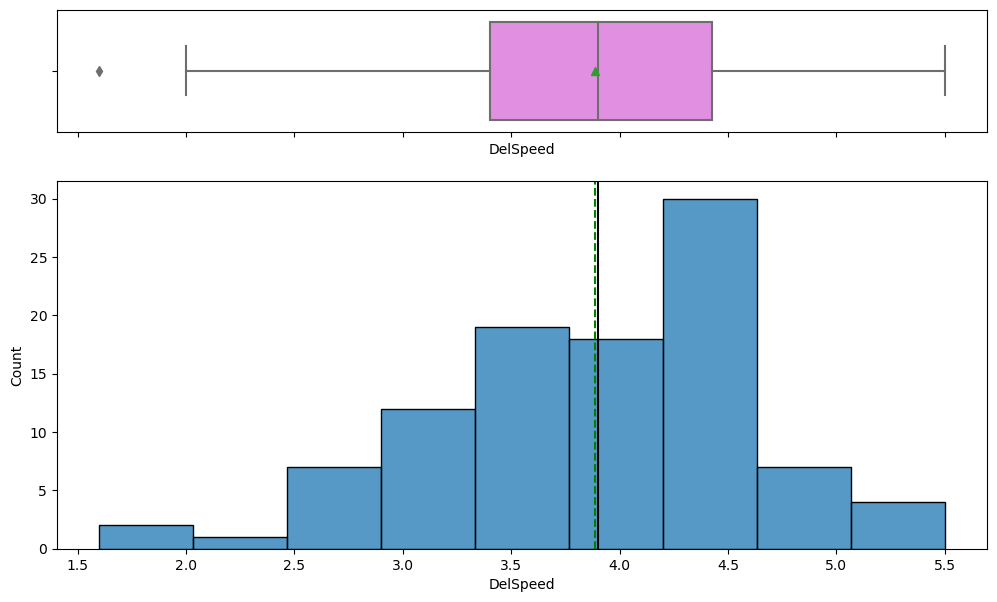

In [149]:
histogram_boxplot(data, 'DelSpeed', figsize=(12, 7), kde=False, bins=None)
plt.savefig("output.jpg", bbox_inches='tight')## Complete the code to plot the histogram and boxplot for DelSpeed

### Bivariate Analysis

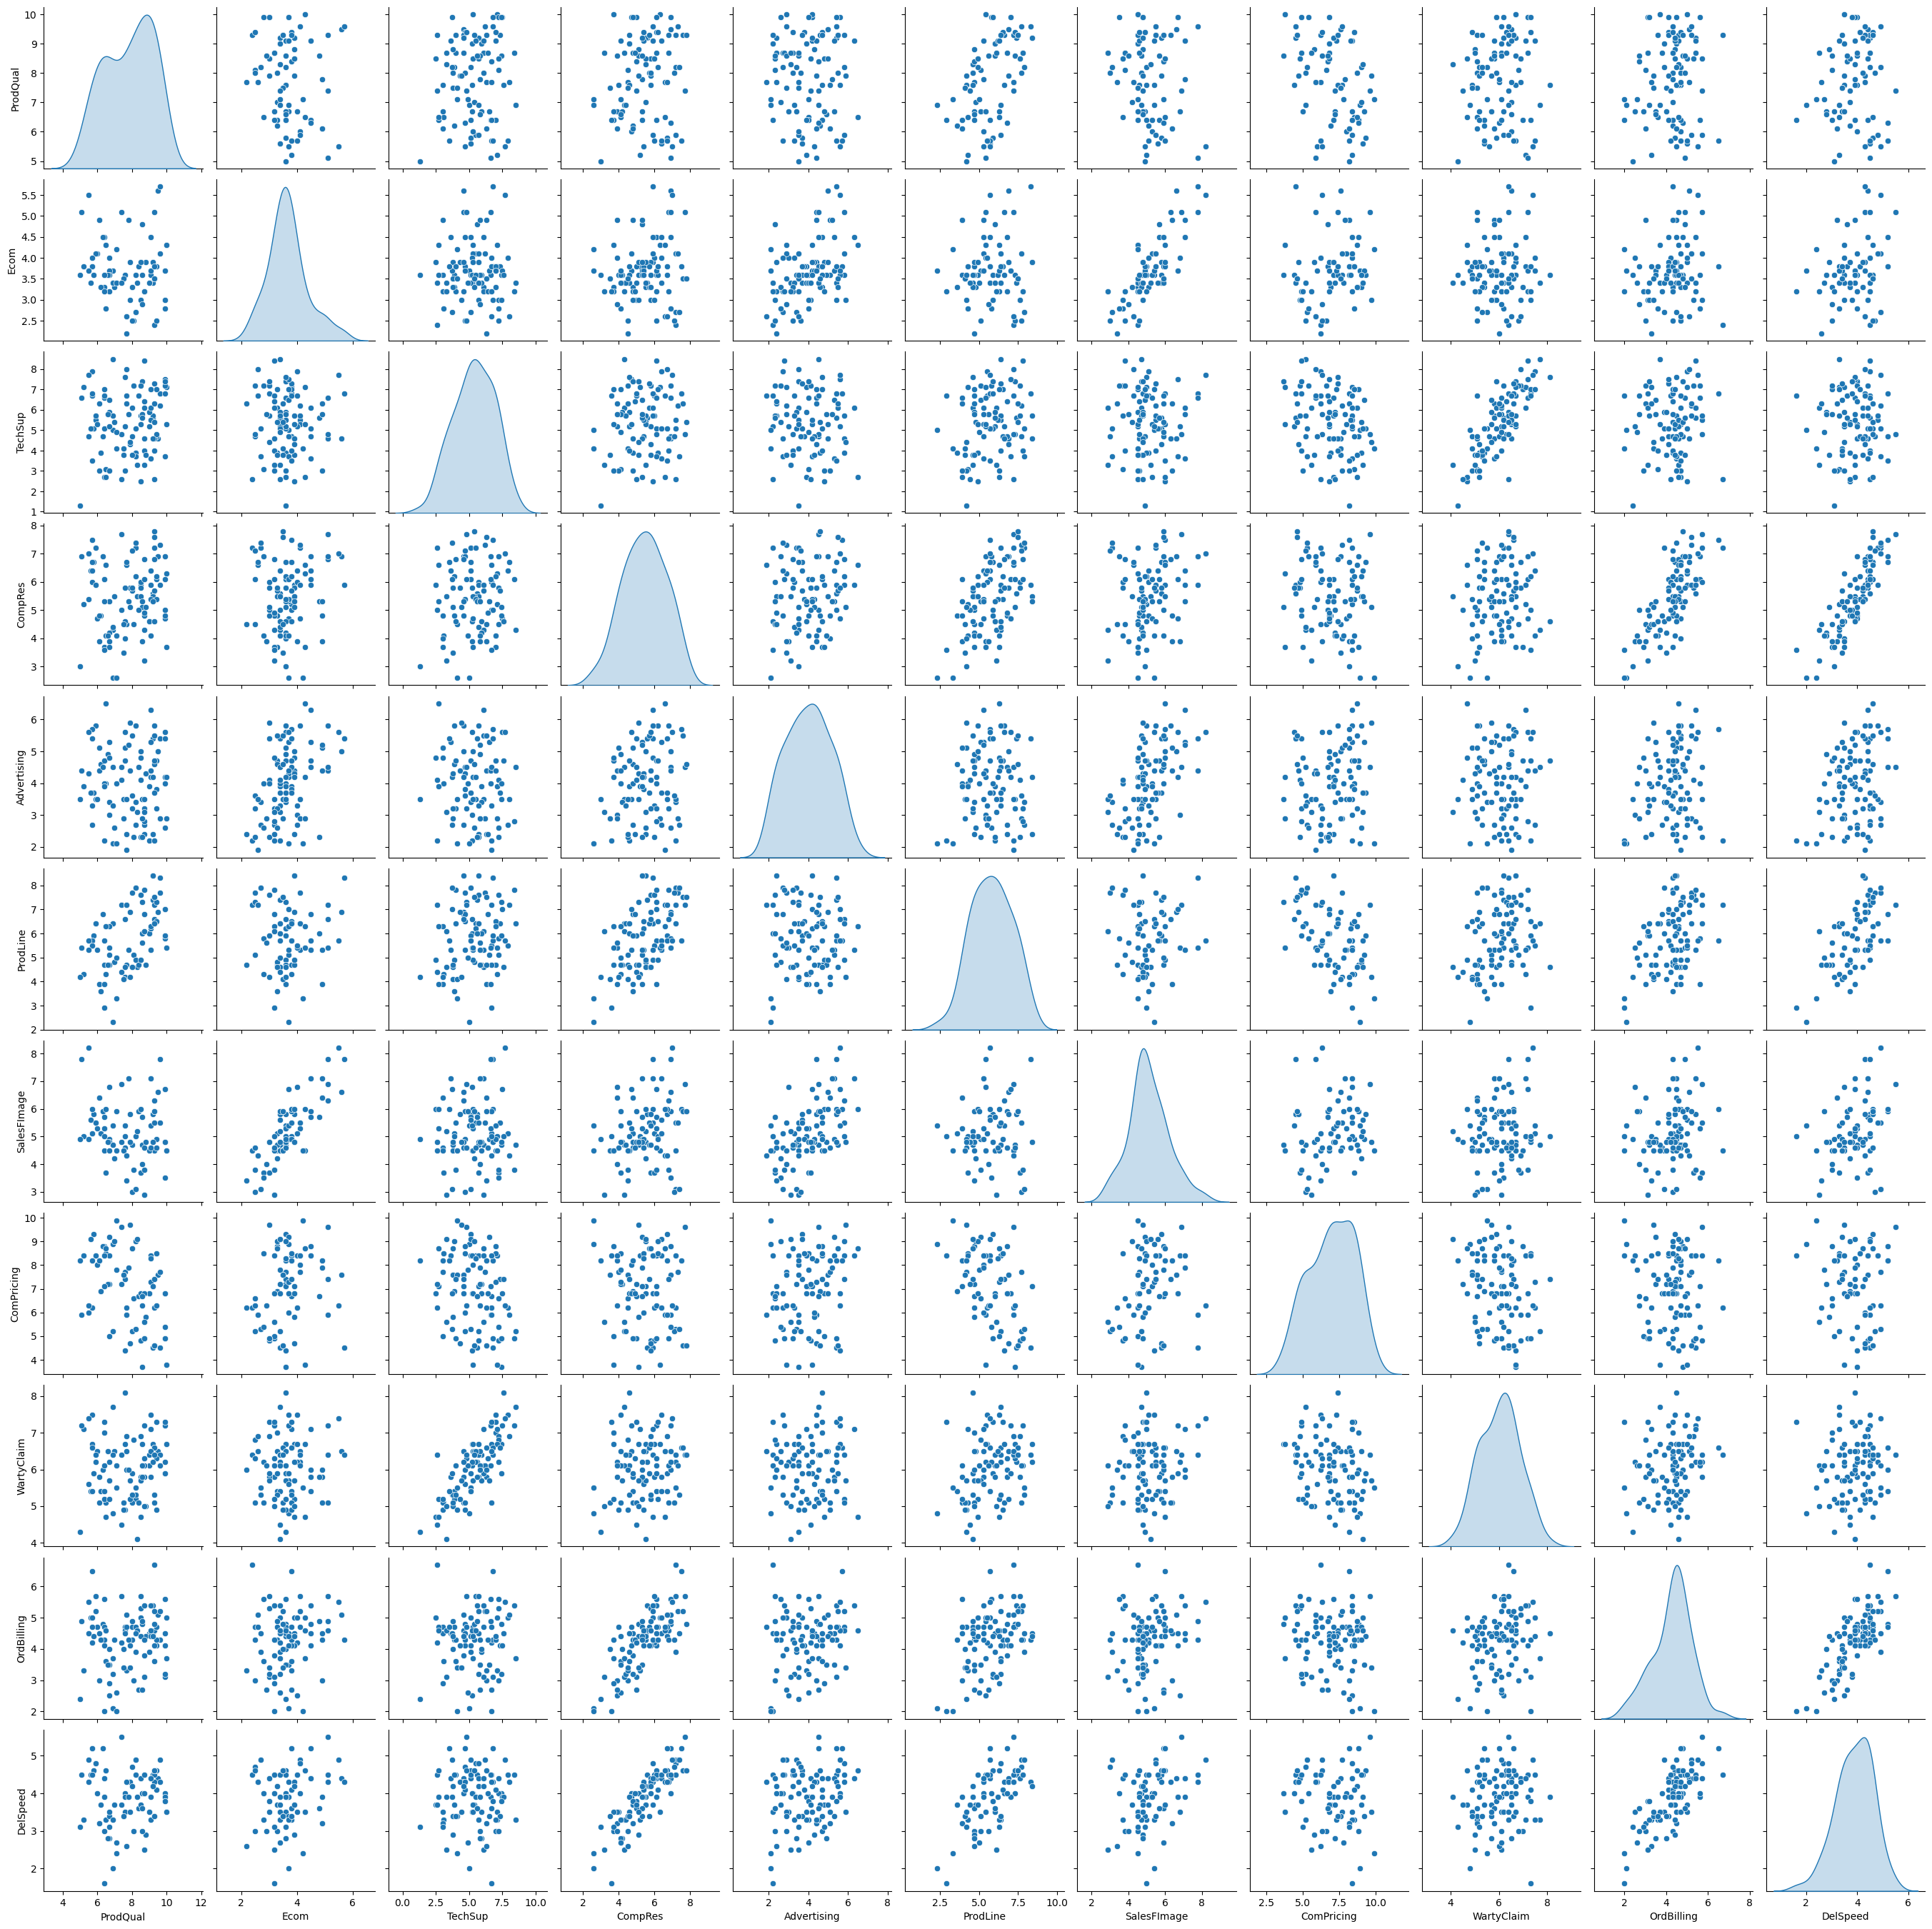

<Figure size 640x480 with 0 Axes>

In [150]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [151]:
data.corr().T

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


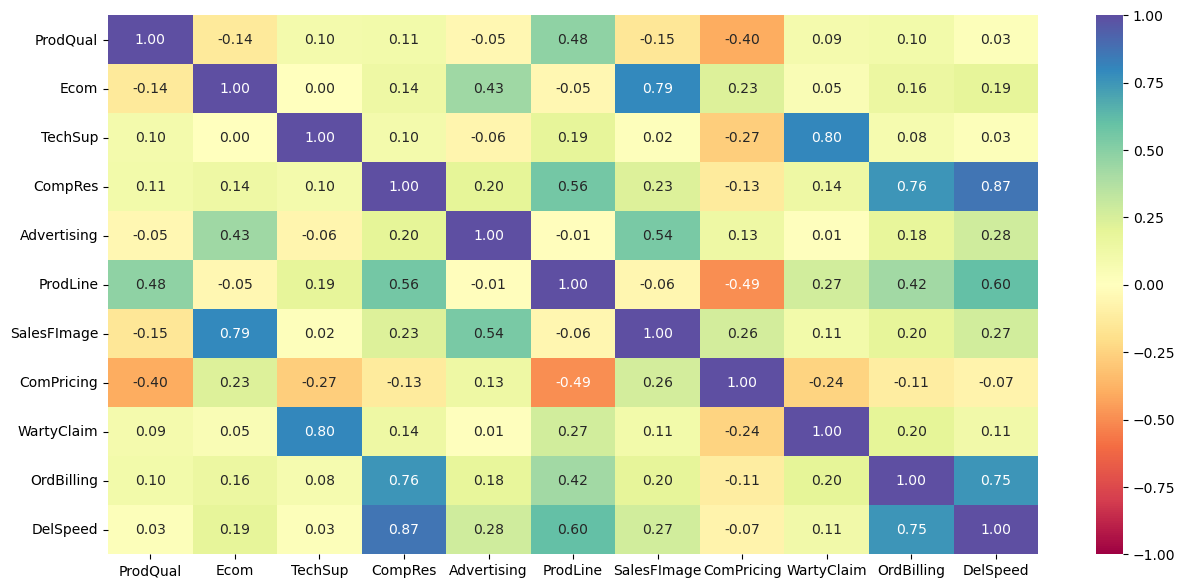

<Figure size 640x480 with 0 Axes>

In [152]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [153]:
c= data.corr().abs()# Since there may be positive as well as -ve correlation 
s= c.unstack() #
so= s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) &  (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping d 
so.columns= ['correlation']
so

correlation
DelSpeed    CompRes         0.865092
TechSup     WartyClaim      0.797168
Ecom        SalesFImage     0.791544
OrdBilling  CompRes         0.756869
DelSpeed    OrdBilling      0.751003
            ProdLine        0.601850
CompRes     ProdLine        0.561417
SalesFImage Advertising     0.542204
ComPricing  ProdLine        0.494948
ProdQual    ProdLine        0.477493
Advertising Ecom            0.429891
ProdLine    OrdBilling      0.424408
ProdQual    ComPricing      0.401282

## Data Preprocessing

In [154]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [155]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [156]:
subset_scaled_df.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


## Checking the outliers after scaling

**Use the same above code (which is used in univariate analysis) to check the outliers and add the observations.**

## Step 1- Create the covariance Matrix

In [157]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)                       ## Complete the code to apply PCA
df_pca = pca.fit_transform(subset_scaled_df)

In [158]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=subset_scaled_df.columns,index=subset_scaled_df.columns) #cov matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.01,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.11,0.03
Ecom,-0.14,1.01,0.00,0.14,0.43,-0.05,0.80,0.23,0.05,0.16,0.19
TechSup,0.10,0.00,1.01,0.10,-0.06,0.19,0.02,-0.27,0.81,0.08,0.03
CompRes,0.11,0.14,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.76,0.87
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28
ProdLine,0.48,-0.05,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61
SalesFImage,-0.15,0.80,0.02,0.23,0.55,-0.06,1.01,0.27,0.11,0.20,0.27
ComPricing,-0.41,0.23,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.12,-0.07
WartyClaim,0.09,0.05,0.81,0.14,0.01,0.28,0.11,-0.25,1.01,0.20,0.11
OrdBilling,0.11,0.16,0.08,0.76,0.19,0.43,0.20,-0.12,0.20,1.01,0.76


## Step 2- Get eigen values and eigen vector

In [159]:
eigenvec=pca.components_                                     ## Complete the code to apply PCA components
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[-0.13 -0.17 -0.16 -0.47 -0.18 -0.39 -0.2   0.15 -0.21 -0.44 -0.47]
 [-0.31  0.45 -0.23  0.02  0.36 -0.28  0.47  0.41 -0.19  0.03  0.07]
 [ 0.06 -0.24 -0.61  0.21 -0.09  0.12 -0.24  0.05 -0.6   0.17  0.23]
 [ 0.64  0.27 -0.19 -0.21  0.32  0.2   0.22 -0.33 -0.19 -0.24 -0.2 ]
 [ 0.23  0.42 -0.02  0.03 -0.8   0.12  0.2   0.25 -0.03  0.03 -0.04]
 [-0.56  0.26 -0.11 -0.03 -0.2   0.1   0.1  -0.71 -0.14 -0.12  0.03]
 [ 0.19  0.06 -0.02 -0.01 -0.06 -0.61  0.   -0.31 -0.03  0.66 -0.23]
 [ 0.14 -0.12  0.46  0.51 -0.05 -0.33  0.17 -0.1  -0.44 -0.37  0.07]
 [ 0.03 -0.54 -0.36  0.09 -0.15 -0.08  0.64 -0.09  0.32 -0.1  -0.02]
 [ 0.07  0.28 -0.39  0.53  0.04 -0.23 -0.35 -0.05  0.44 -0.3  -0.12]
 [ 0.18  0.06 -0.05 -0.36 -0.08 -0.39 -0.08 -0.1   0.13 -0.19  0.78]]


In [160]:
eigenvalues=pca.explained_variance_                                   ## Complete the code to apply PCA Explained Variance
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.46 2.58 1.71 1.1  0.62 0.56 0.41 0.25 0.21 0.13 0.1 ]


In [161]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [162]:
var_exp

array([31., 23., 15., 10.,  6.,  5.,  4.,  2.,  2.,  1.,  1.])

## Step 3 View Scree Plot to identify the number of components to be built

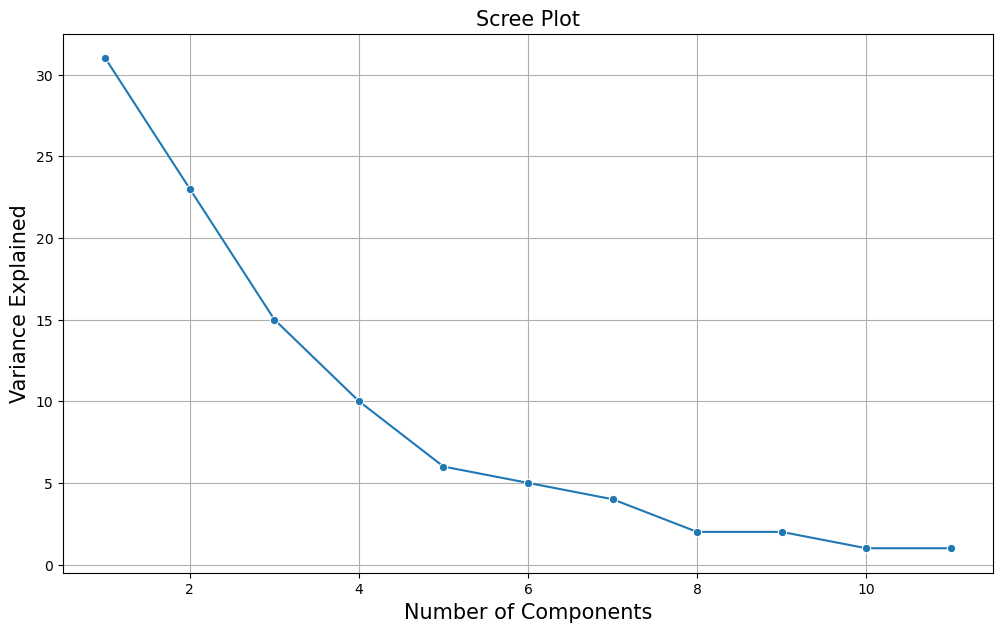

<Figure size 640x480 with 0 Axes>

In [163]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

## Step 4 Apply PCA for the number of decided components to get the loadings and component output

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=123)        ## Complete the code to apply the appropriate PCA components from the above plot
df_pca = pca.fit_transform(subset_scaled_df)
df_pca.transpose() # Component output

array([[ 0.0795508 , -1.10096634, -2.19706653,  1.56293289,  0.76757039,
         2.90862177,  5.29319132,  1.47659077, -0.61394761, -0.42366008,
         0.57625231,  1.86757037, -2.66029481, -1.15437973, -1.98252867,
        -1.19534642, -0.6292106 , -1.94912563, -0.44065433, -1.18679105,
         1.32903312, -3.07501457, -1.22862294, -1.9521566 ,  0.27711435,
        -0.33863508, -1.7647172 ,  1.0351017 , -1.29479142,  1.66262708,
         0.14460849,  2.1146274 ,  1.06970726, -0.10940809,  1.80536022,
         2.1224852 ,  0.62205111, -2.57411754, -0.34496698,  1.21539637,
         1.25487586,  0.16793078, -1.82095895, -2.33269255, -0.87328888,
        -1.65347263, -1.03184895, -3.12115015, -1.07236222, -0.79767523,
         1.98945764, -1.15121892, -1.07789784,  1.16797753,  0.52852266,
        -0.3768932 , -3.50943905, -1.28569623,  0.57436837, -1.10762365,
        -2.11898365,  1.19627748,  1.22409809,  2.78237859,  1.83048999,
        -1.25224924, -1.39907113,  0.0918897 ,  2.5

In [165]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(subset_scaled_df),index=['PC0','PC1'])
df_pca_loading.shape

(2, 11)

In [166]:
df_pca_loading = np.round(df_pca_loading,2)

In [167]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC0,-0.130000,-0.170000,-0.160000,-0.470000,-0.180000,-0.390000,-0.200000,0.150000,-0.210000,-0.440000,-0.470000
PC1,-0.310000,0.450000,-0.230000,0.020000,0.360000,-0.280000,0.470000,0.410000,-0.190000,0.030000,0.070000


In [169]:
# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=df_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 54.34% of the variance in the data.


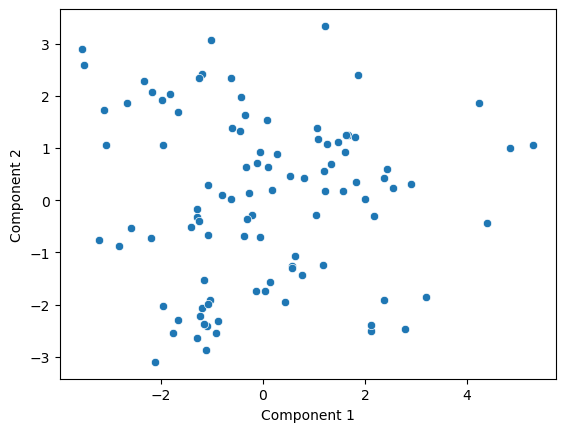

In [170]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")
plt.savefig("output.jpg", bbox_inches='tight')

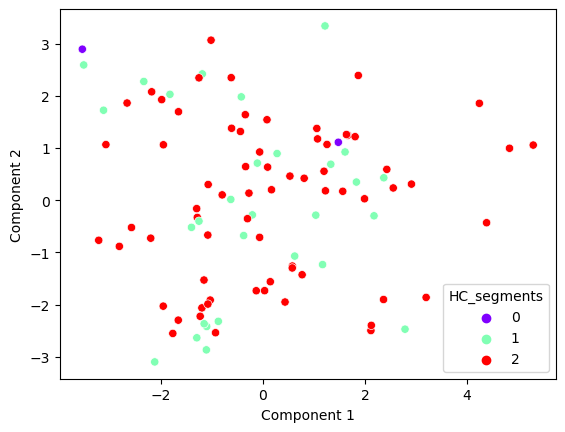

In [171]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)
plt.savefig("output.jpg", bbox_inches='tight')

In [172]:
# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_                            ## Complete the code to get the explained variance

# Interpretation of principal components
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Display results
print("Explained Variance Ratio:", explained_var_ratio)
print("Principal Component 1 Loadings:", pc1_loadings)
print("Principal Component 2 Loadings:", pc2_loadings)

Explained Variance Ratio: [0.31154285 0.2318997 ]
Principal Component 1 Loadings: [-0.13378962 -0.16595278 -0.15769263 -0.47068359 -0.18373495 -0.38676517
 -0.2036696   0.15168864 -0.21293363 -0.43721774 -0.47308914]
Principal Component 2 Loadings: [-0.31349802  0.44650918 -0.23096734  0.01944394  0.36366471 -0.28478056
  0.47069599  0.4134565  -0.19167191  0.02639905  0.07305172]


In [173]:
# Cumulative explained variance ratio
cumulative_explained_var = np.cumsum(explained_var_ratio)           ## Complete the code to get the cumulative explained variance

# Display results
print("Cumulative Explained Variance:", cumulative_explained_var)

Cumulative Explained Variance: [0.31154285 0.54344255]


In [174]:
# Applying K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=1)
labels_original = kmeans_original.fit_predict(k_means_df)
kmeans_original

KMeans(n_clusters=3, random_state=1)

In [175]:
labels_original

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [176]:
# Applying K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=1)
labels_pca = kmeans_pca.fit_predict(df_pca)
kmeans_pca

KMeans(n_clusters=3, random_state=1)

In [177]:
labels_pca

array([2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0])

In [178]:
plt.scatter(k_means_df[''], k_means_df[''], c=labels_original, cmap='viridis')
plt.title('Clustering on Original Data')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

KeyError: 'DelSpeed'

<Axes: title={'center': 'Clustering on PCA Transformed Data'}, xlabel='Component 1', ylabel='Component 2'>

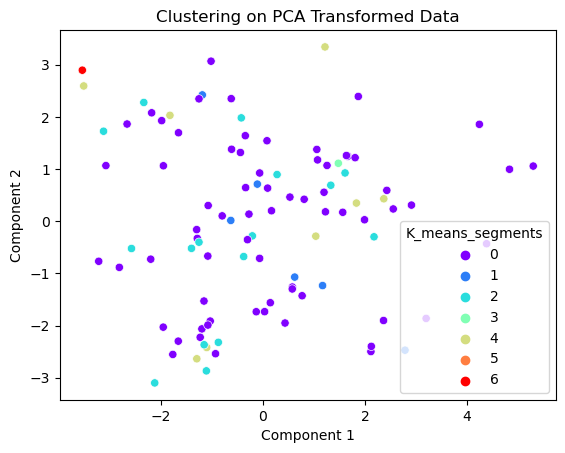

In [180]:
plt.title('Clustering on PCA Transformed Data')
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["K_means_segments"],
    palette="rainbow",
)